In [2]:
import scanpy as sc
import anndata as ad
from scprocessing.Pipeline import Pipeline
from scprocessing.QC import QC
from scprocessing.Normalization import Normalization
from scprocessing.Integration import Integration
from scprocessing.metrics import jaccard, silhouette, davies, calinski, evaluate
from scprocessing.SelectPipeline import SelectPipeline

In [3]:
%load_ext autoreload
%autoreload 2

In [2]:
# paths
nsg_bus_1 = "/mnt/shared/nationwide/Counts/NSG_BUS_1/outs/filtered_feature_bc_matrix.h5"
nsg_bus_2 = "/mnt/shared/nationwide/Counts/NSG_BUS_2/outs/filtered_feature_bc_matrix.h5"
nsg_bus_3 = "/mnt/shared/nationwide/Counts/NSG_BUS_3/outs/filtered_feature_bc_matrix.h5"

nsg_ctl_1 = "/mnt/shared/nationwide/Counts/NSG_CNTL_1/outs/filtered_feature_bc_matrix.h5"
nsg_ctl_2 = "/mnt/shared/nationwide/Counts/NSG_CNTL_2/outs/filtered_feature_bc_matrix.h5"
nsg_ctl_3 = "/mnt/shared/nationwide/Counts/NSG_CNTL_3/outs/filtered_feature_bc_matrix.h5"

nsg_s_bus_1 = "/mnt/shared/nationwide/Counts/NSG_S_BUS_1/outs/filtered_feature_bc_matrix.h5"
nsg_s_bus_2 = "/mnt/shared/nationwide/Counts/NSG_S_BUS_2/outs/filtered_feature_bc_matrix.h5"
nsg_s_bus_3 = "/mnt/shared/nationwide/Counts/NSG_S_BUS_3/outs/filtered_feature_bc_matrix.h5"

nsg_s_ctl_1 = "/mnt/shared/nationwide/Counts/NSG_S_CNTL_1/outs/filtered_feature_bc_matrix.h5"
nsg_s_ctl_2 = "/mnt/shared/nationwide/Counts/NSG_S_CNTL_2/outs/filtered_feature_bc_matrix.h5"
nsg_s_ctl_3 = "/mnt/shared/nationwide/Counts/NSG_S_CNTL_3/outs/filtered_feature_bc_matrix.h5"

# Reading Datasets

In [ ]:
# read data
nsg_bus_1_data = sc.read_10x_h5(nsg_bus_1)
nsg_bus_2_data = sc.read_10x_h5(nsg_bus_2)
nsg_bus_3_data = sc.read_10x_h5(nsg_bus_3)

# creating metadata
nsg_bus_1_data.obs["Trial"] = "1"
nsg_bus_2_data.obs["Trial"] = "2"
nsg_bus_3_data.obs["Trial"] = "3"

# making names unique
nsg_bus_1_data.var_names_make_unique()
nsg_bus_2_data.var_names_make_unique()
nsg_bus_3_data.var_names_make_unique()

nsg_bus_1_data.obs_names_make_unique()
nsg_bus_2_data.obs_names_make_unique()
nsg_bus_3_data.obs_names_make_unique()

In [ ]:
nsg_ctl_1_data = sc.read_10x_h5(nsg_ctl_1)
nsg_ctl_2_data = sc.read_10x_h5(nsg_ctl_2)
nsg_ctl_3_data = sc.read_10x_h5(nsg_ctl_3)

nsg_ctl_1_data.obs["Trial"] = "1"
nsg_ctl_2_data.obs["Trial"] = "2"
nsg_ctl_3_data.obs["Trial"] = "3"

nsg_ctl_1_data.var_names_make_unique()
nsg_ctl_2_data.var_names_make_unique()
nsg_ctl_3_data.var_names_make_unique()

nsg_ctl_1_data.obs_names_make_unique()
nsg_ctl_2_data.obs_names_make_unique()
nsg_ctl_3_data.obs_names_make_unique()

In [ ]:
nsg_s_bus_1_data = sc.read_10x_h5(nsg_s_bus_1)
nsg_s_bus_2_data = sc.read_10x_h5(nsg_s_bus_2)
nsg_s_bus_3_data = sc.read_10x_h5(nsg_s_bus_3)

nsg_s_bus_1_data.obs["Trial"] = "1"
nsg_s_bus_2_data.obs["Trial"] = "2"
nsg_s_bus_3_data.obs["Trial"] = "3"

nsg_s_bus_1_data.var_names_make_unique()
nsg_s_bus_2_data.var_names_make_unique()
nsg_s_bus_3_data.var_names_make_unique()

nsg_s_bus_1_data.obs_names_make_unique()
nsg_s_bus_2_data.obs_names_make_unique()
nsg_s_bus_3_data.obs_names_make_unique()

In [ ]:
nsg_s_ctl_1_data = sc.read_10x_h5(nsg_ctl_1)
nsg_s_ctl_2_data = sc.read_10x_h5(nsg_ctl_2)
nsg_s_ctl_3_data = sc.read_10x_h5(nsg_ctl_3)

nsg_s_ctl_1_data.obs["Trial"] = "1"
nsg_s_ctl_2_data.obs["Trial"] = "2"
nsg_s_ctl_3_data.obs["Trial"] = "3"

nsg_s_ctl_1_data.var_names_make_unique()
nsg_s_ctl_2_data.var_names_make_unique()
nsg_s_ctl_3_data.var_names_make_unique()

nsg_s_ctl_1_data.obs_names_make_unique()
nsg_s_ctl_2_data.obs_names_make_unique()
nsg_s_ctl_3_data.obs_names_make_unique()

In [4]:
# human_brca = sc.read_h5ad("/mnt/shared/nationwide/cell_type_datasets/human_brca.h5ad")
human_brca_stroma = sc.read_h5ad("/mnt/shared/nationwide/cell_type_datasets/human_brca_stroma.h5ad")
human_brca_epithelial = sc.read_h5ad("/mnt/shared/nationwide/cell_type_datasets/human_brca_epithelial.h5ad")
human_brca_immune = sc.read_h5ad("/mnt/shared/nationwide/cell_type_datasets/human_brca_immune.h5ad")
human_brca_global = sc.read_h5ad("/mnt/shared/nationwide/cell_type_datasets/human_brca_global.h5ad")

In [6]:
# human_brca.var_names_make_unique()
# human_brca.obs_names_make_unique()

human_brca_stroma.var_names_make_unique()
human_brca_stroma.obs_names_make_unique()

human_brca_epithelial.var_names_make_unique()
human_brca_epithelial.obs_names_make_unique()

human_brca_immune.var_names_make_unique()
human_brca_immune.obs_names_make_unique()

human_brca_global.var_names_make_unique()
human_brca_global.obs_names_make_unique()

human_brca_epithelial.obs["Type"] = "Epithelial"
human_brca_stroma.obs["Type"] = "Stroma"
human_brca_immune.obs["Type"] = "Immune"
human_brca_global.obs["Type"] = "Global"

del human_brca_epithelial.obsm["X_diffmap"]
del human_brca_stroma.obsm["X_diffmap"]
del human_brca_immune.obsm["X_diffmap"]
del human_brca_global.obsm["X_diffmap"]

In [4]:
human_brca_immune = sc.read_h5ad("/mnt/shared/nationwide/cell_type_datasets/human_brca_immune.h5ad")
human_brca_immune.var_names_make_unique()
human_brca_immune.obs_names_make_unique()
del human_brca_immune.obsm["X_diffmap"]

In [5]:
cond1 = "30-year-old human stage"
cond2 = "31-year-old human stage"
cond3 = "33-year-old human stage"
cond4 = "34-year-old human stage"
cond5 = "35-year-old human stage"
brca_group_1 = human_brca_immune[human_brca_immune.obs["development_stage"] == cond1]
brca_group_2 = human_brca_immune[human_brca_immune.obs["development_stage"] == cond2]
brca_group_3 = human_brca_immune[human_brca_immune.obs["development_stage"] == cond3]
brca_group_4 = human_brca_immune[human_brca_immune.obs["development_stage"] == cond4]
brca_group_5 = human_brca_immune[human_brca_immune.obs["development_stage"] == cond5]

brca_group_1.obs["Type"] = cond1
brca_group_2.obs["Type"] = cond2
brca_group_3.obs["Type"] = cond3
brca_group_4.obs["Type"] = cond4
brca_group_5.obs["Type"] = cond5

brca_group_1.obs["Type"] = brca_group_1.obs["Type"].astype("category")
brca_group_2.obs["Type"] = brca_group_2.obs["Type"].astype("category")
brca_group_3.obs["Type"] = brca_group_3.obs["Type"].astype("category")
brca_group_4.obs["Type"] = brca_group_4.obs["Type"].astype("category")
brca_group_5.obs["Type"] = brca_group_5.obs["Type"].astype("category")

/tmp/ipykernel_532674/648891418.py:12: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  brca_group_1.obs["Type"] = cond1
/tmp/ipykernel_532674/648891418.py:13: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  brca_group_2.obs["Type"] = cond2
/tmp/ipykernel_532674/648891418.py:14: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  brca_group_3.obs["Type"] = cond3
/tmp/ipykernel_532674/648891418.py:15: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  brca_group_4.obs["Type"] = cond4
/tmp/ipykernel_532674/648891418.py:16: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  brca_group_5.obs["Type"] = cond5


# Run Pipeline

In [132]:
preprocess = Pipeline()
preprocess.add_step(QC())
preprocess.add_step(Normalization(method="zheng17"))
preprocess.add_step(Integration(method="merge"))
integrated = preprocess.execute([nsg_s_ctl_1_data, nsg_s_ctl_2_data, nsg_s_ctl_3_data])

In [ ]:
preprocess = Pipeline()
preprocess.add_step(QC())
preprocess.add_step(Normalization(method="seurat"))
preprocess.add_step(Integration(method="harmony"))
harmony = preprocess.execute([nsg_s_ctl_1_data, nsg_s_ctl_2_data, nsg_s_ctl_3_data])

In [ ]:
preprocess = Pipeline()
preprocess.add_step(QC())
preprocess.add_step(Normalization(method="seurat"))
preprocess.add_step(Integration(method="merge"))
sctransform = preprocess.execute([nsg_s_ctl_1_data, nsg_s_ctl_2_data, nsg_s_ctl_3_data])

In [ ]:
preprocess = Pipeline()
preprocess.add_step(QC())
preprocess.add_step(Normalization())
preprocess.add_step(Integration(method="scanorama"))
scanorama = preprocess.execute([nsg_s_ctl_1_data, nsg_s_ctl_2_data, nsg_s_ctl_3_data])

# Model Selection

In [7]:
datasets = [brca_group_1, brca_group_2, brca_group_3, brca_group_4, brca_group_5]
select_cell_type = SelectPipeline(normalization=["seurat", "zheng17"],\
                                  integration=["harmony", "merge", "scanorama"],\
                                  metrics=["jaccard", "ari", "nmi"])

Normalizing Datasets


2024-05-11 20:04:12,938 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...


Integrating Datasets


2024-05-11 20:04:14,147 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-05-11 20:04:14,174 - harmonypy - INFO - Iteration 1 of 10
2024-05-11 20:04:14,821 - harmonypy - INFO - Iteration 2 of 10
2024-05-11 20:04:15,465 - harmonypy - INFO - Iteration 3 of 10
2024-05-11 20:04:16,125 - harmonypy - INFO - Iteration 4 of 10
2024-05-11 20:04:16,375 - harmonypy - INFO - Iteration 5 of 10
2024-05-11 20:04:16,564 - harmonypy - INFO - Iteration 6 of 10
2024-05-11 20:04:16,788 - harmonypy - INFO - Converged after 6 iterations
/home/user/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
/home/user/scRNAseq-benchmarking/scprocessing/Integration.py:58: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterati

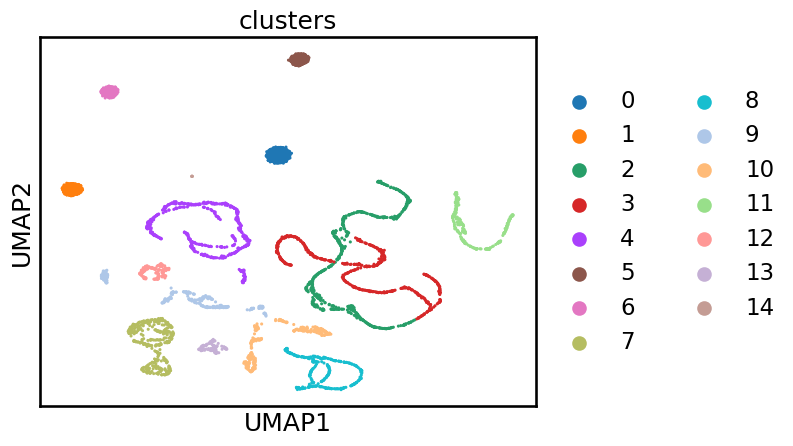

2024-05-11 20:04:36,895 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...


Integrating Datasets


2024-05-11 20:04:38,100 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-05-11 20:04:38,138 - harmonypy - INFO - Iteration 1 of 10
2024-05-11 20:04:38,744 - harmonypy - INFO - Iteration 2 of 10
2024-05-11 20:04:39,340 - harmonypy - INFO - Iteration 3 of 10
2024-05-11 20:04:39,934 - harmonypy - INFO - Iteration 4 of 10
2024-05-11 20:04:40,168 - harmonypy - INFO - Iteration 5 of 10
2024-05-11 20:04:40,344 - harmonypy - INFO - Iteration 6 of 10
2024-05-11 20:04:40,546 - harmonypy - INFO - Converged after 6 iterations
/home/user/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


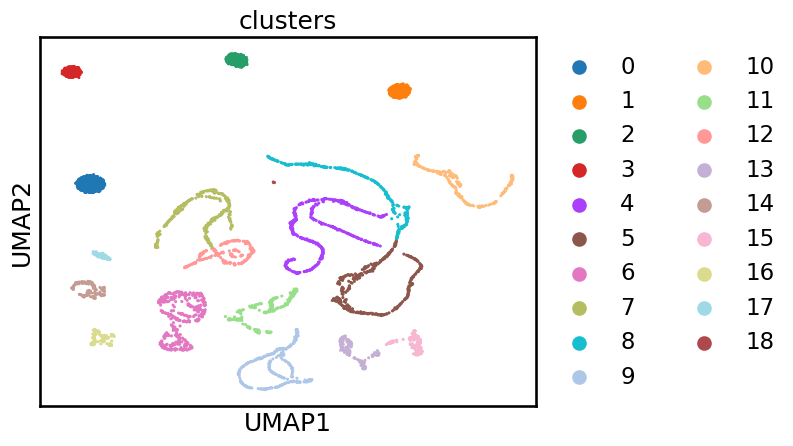

2024-05-11 20:04:54,920 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...


Integrating Datasets


2024-05-11 20:04:56,030 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-05-11 20:04:56,056 - harmonypy - INFO - Iteration 1 of 10
2024-05-11 20:04:56,665 - harmonypy - INFO - Iteration 2 of 10
2024-05-11 20:04:57,302 - harmonypy - INFO - Iteration 3 of 10
2024-05-11 20:04:57,925 - harmonypy - INFO - Iteration 4 of 10
2024-05-11 20:04:58,175 - harmonypy - INFO - Iteration 5 of 10
2024-05-11 20:04:58,383 - harmonypy - INFO - Iteration 6 of 10
2024-05-11 20:04:58,597 - harmonypy - INFO - Converged after 6 iterations
/home/user/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


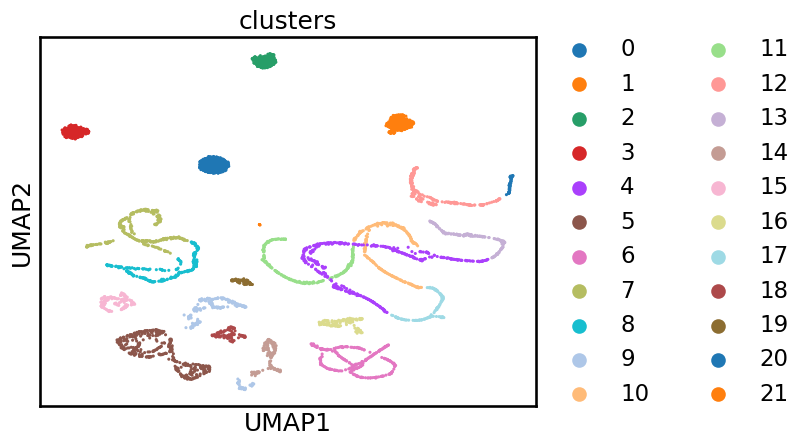

2024-05-11 20:05:12,783 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...


Integrating Datasets


2024-05-11 20:05:14,098 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-05-11 20:05:14,124 - harmonypy - INFO - Iteration 1 of 10
2024-05-11 20:05:14,874 - harmonypy - INFO - Iteration 2 of 10
2024-05-11 20:05:15,648 - harmonypy - INFO - Iteration 3 of 10
2024-05-11 20:05:16,438 - harmonypy - INFO - Iteration 4 of 10
2024-05-11 20:05:16,692 - harmonypy - INFO - Iteration 5 of 10
2024-05-11 20:05:16,878 - harmonypy - INFO - Iteration 6 of 10
2024-05-11 20:05:17,124 - harmonypy - INFO - Converged after 6 iterations
/home/user/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


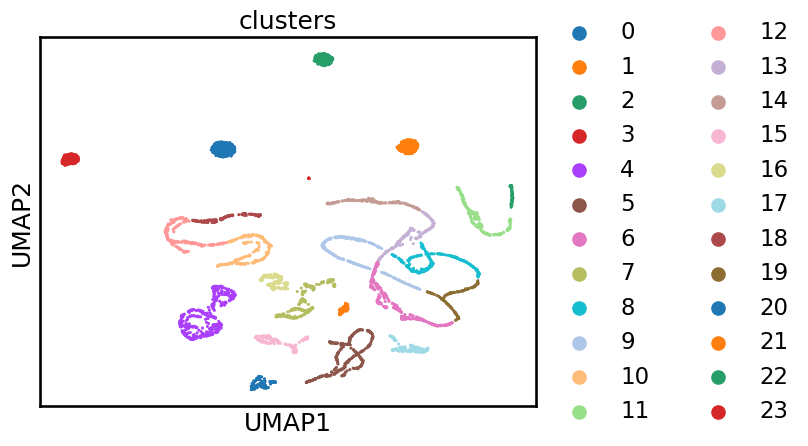

2024-05-11 20:05:31,724 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...


Integrating Datasets


2024-05-11 20:05:32,914 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-05-11 20:05:32,943 - harmonypy - INFO - Iteration 1 of 10
2024-05-11 20:05:33,613 - harmonypy - INFO - Iteration 2 of 10
2024-05-11 20:05:34,302 - harmonypy - INFO - Iteration 3 of 10
2024-05-11 20:05:34,971 - harmonypy - INFO - Iteration 4 of 10
2024-05-11 20:05:35,228 - harmonypy - INFO - Iteration 5 of 10
2024-05-11 20:05:35,422 - harmonypy - INFO - Iteration 6 of 10
2024-05-11 20:05:35,650 - harmonypy - INFO - Converged after 6 iterations
/home/user/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


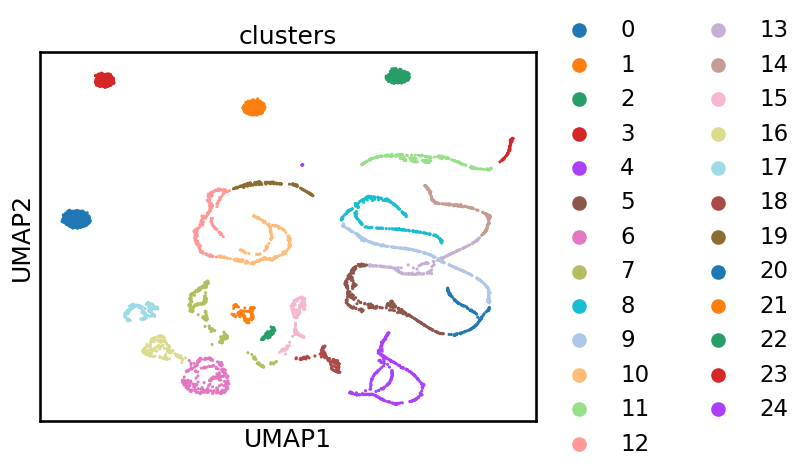

2024-05-11 20:05:50,099 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...


Integrating Datasets


2024-05-11 20:05:51,303 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-05-11 20:05:51,334 - harmonypy - INFO - Iteration 1 of 10


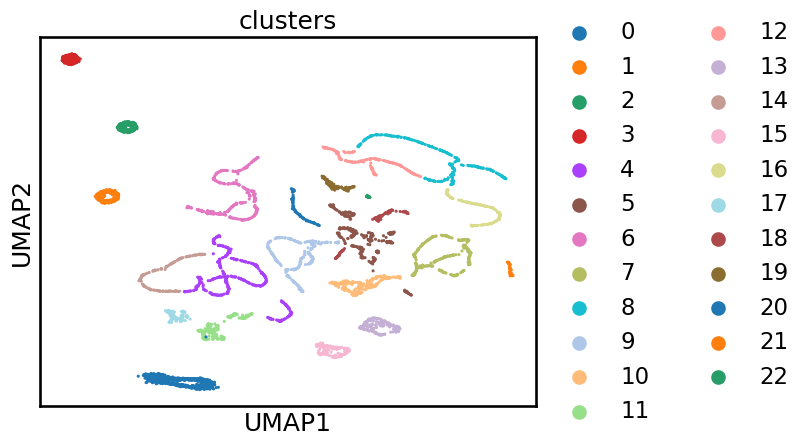

Integrating Datasets


/home/user/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


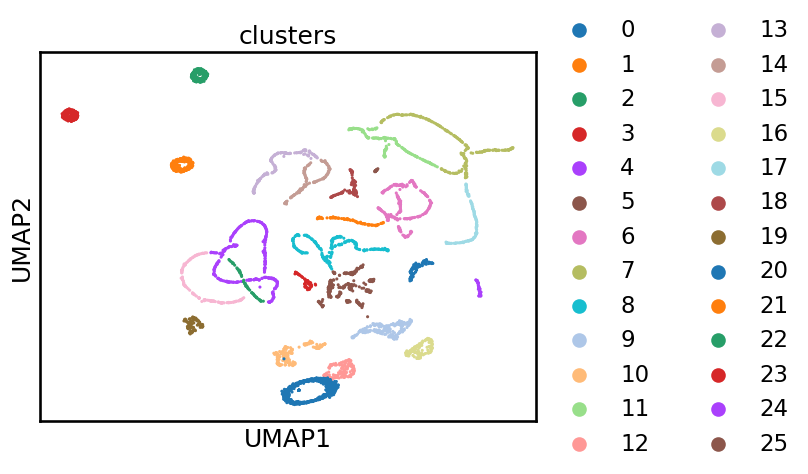

Integrating Datasets


/home/user/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


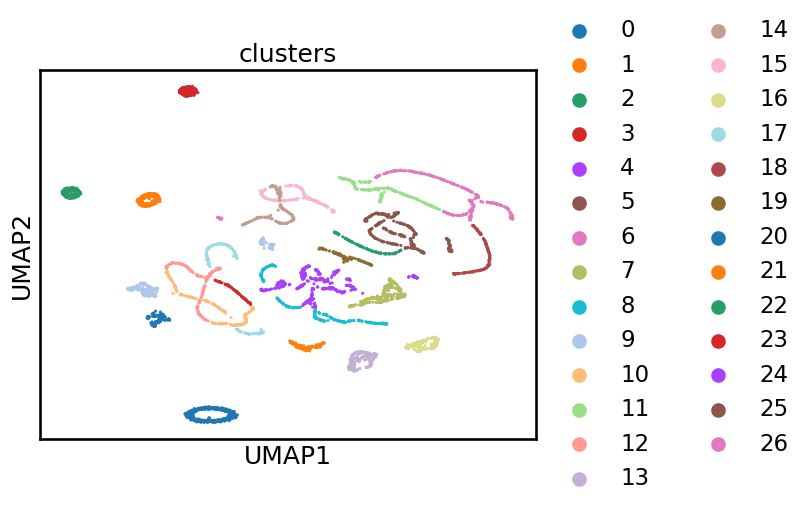

Integrating Datasets


/home/user/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


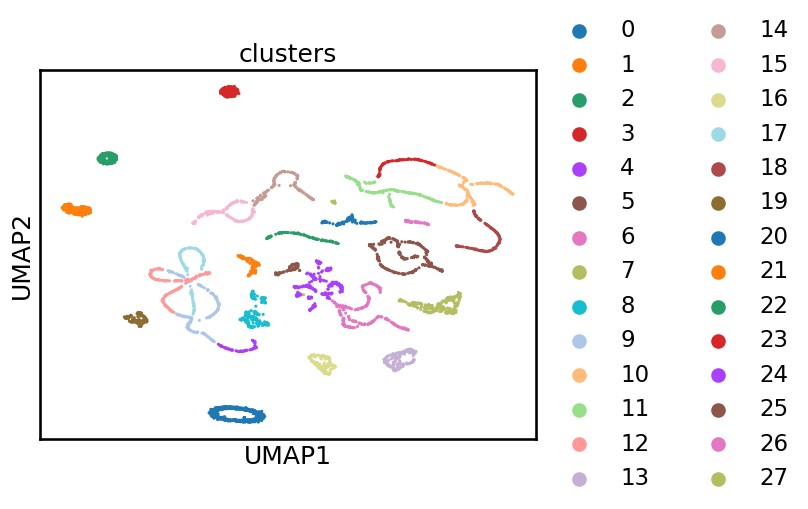

Integrating Datasets


/home/user/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


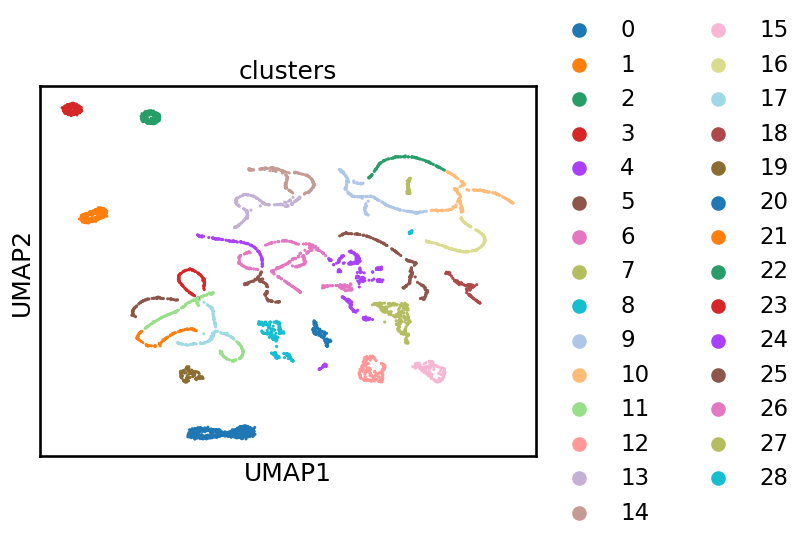

Integrating Datasets
[[0.         0.34595701 0.35823951 0.21187308 0.1       ]
 [0.         0.         0.36532098 0.3514229  0.35      ]
 [0.         0.         0.         0.28171167 0.45      ]
 [0.         0.         0.         0.         0.65      ]
 [0.         0.         0.         0.         0.        ]]
Processing datasets 34-year-old human stage <=> 35-year-old human stage
Processing datasets 33-year-old human stage <=> 35-year-old human stage
Processing datasets 31-year-old human stage <=> 33-year-old human stage
Processing datasets 30-year-old human stage <=> 33-year-old human stage
Processing datasets 31-year-old human stage <=> 34-year-old human stage
Processing datasets 31-year-old human stage <=> 35-year-old human stage
Processing datasets 30-year-old human stage <=> 31-year-old human stage
Processing datasets 33-year-old human stage <=> 34-year-old human stage
Processing datasets 30-year-old human stage <=> 34-year-old human stage


/home/user/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


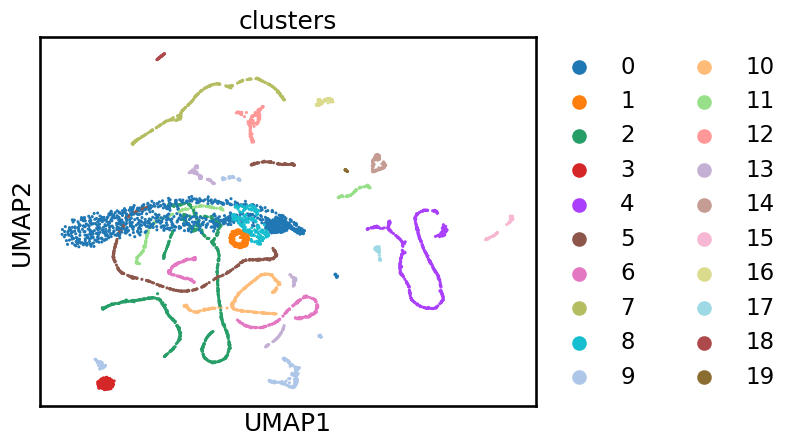

Integrating Datasets
[[0.         0.34493347 0.35823951 0.21187308 0.1       ]
 [0.         0.         0.36399735 0.3514229  0.35      ]
 [0.         0.         0.         0.28120224 0.45      ]
 [0.         0.         0.         0.         0.65      ]
 [0.         0.         0.         0.         0.        ]]
Processing datasets 34-year-old human stage <=> 35-year-old human stage
Processing datasets 33-year-old human stage <=> 35-year-old human stage
Processing datasets 31-year-old human stage <=> 33-year-old human stage
Processing datasets 30-year-old human stage <=> 33-year-old human stage
Processing datasets 31-year-old human stage <=> 34-year-old human stage
Processing datasets 31-year-old human stage <=> 35-year-old human stage
Processing datasets 30-year-old human stage <=> 31-year-old human stage
Processing datasets 33-year-old human stage <=> 34-year-old human stage
Processing datasets 30-year-old human stage <=> 34-year-old human stage


/home/user/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


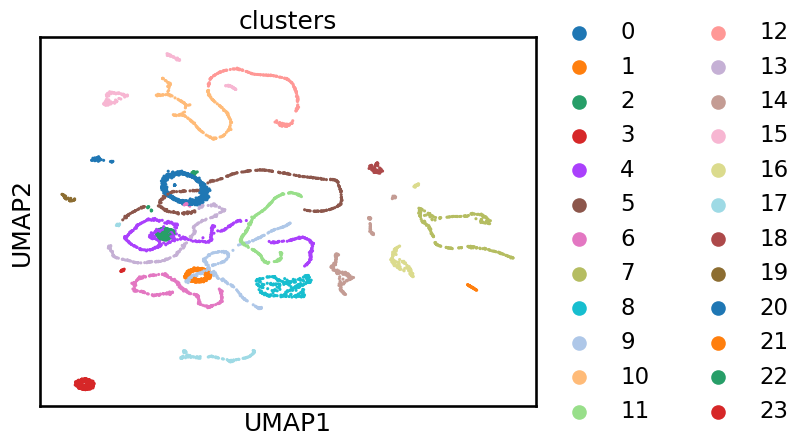

Integrating Datasets
[[0.         0.34493347 0.35823951 0.21187308 0.1       ]
 [0.         0.         0.36532098 0.3514229  0.35      ]
 [0.         0.         0.         0.28171167 0.45      ]
 [0.         0.         0.         0.         0.65      ]
 [0.         0.         0.         0.         0.        ]]
Processing datasets 34-year-old human stage <=> 35-year-old human stage
Processing datasets 33-year-old human stage <=> 35-year-old human stage
Processing datasets 31-year-old human stage <=> 33-year-old human stage
Processing datasets 30-year-old human stage <=> 33-year-old human stage
Processing datasets 31-year-old human stage <=> 34-year-old human stage
Processing datasets 31-year-old human stage <=> 35-year-old human stage
Processing datasets 30-year-old human stage <=> 31-year-old human stage
Processing datasets 33-year-old human stage <=> 34-year-old human stage
Processing datasets 30-year-old human stage <=> 34-year-old human stage


/home/user/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


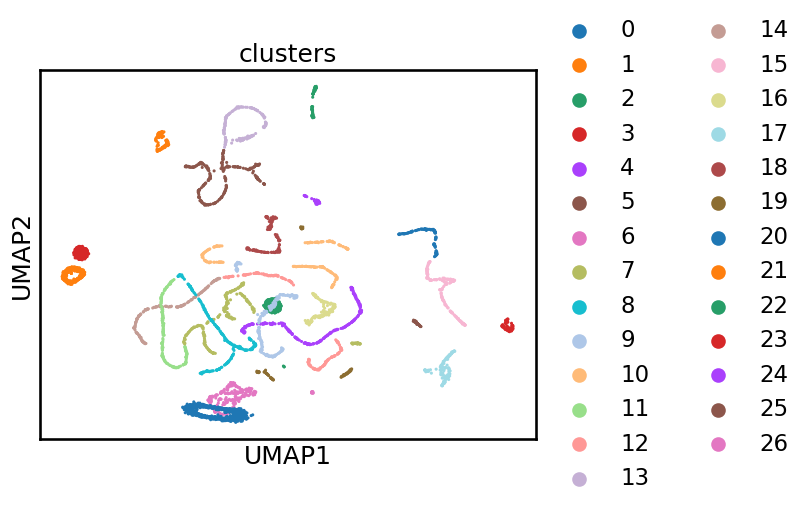

Integrating Datasets
[[0.         0.34800409 0.35823951 0.21187308 0.1       ]
 [0.         0.         0.36201191 0.3514229  0.35      ]
 [0.         0.         0.         0.28171167 0.45      ]
 [0.         0.         0.         0.         0.4       ]
 [0.         0.         0.         0.         0.        ]]
Processing datasets 33-year-old human stage <=> 35-year-old human stage
Processing datasets 34-year-old human stage <=> 35-year-old human stage
Processing datasets 31-year-old human stage <=> 33-year-old human stage
Processing datasets 30-year-old human stage <=> 33-year-old human stage
Processing datasets 31-year-old human stage <=> 34-year-old human stage
Processing datasets 31-year-old human stage <=> 35-year-old human stage
Processing datasets 30-year-old human stage <=> 31-year-old human stage
Processing datasets 33-year-old human stage <=> 34-year-old human stage
Processing datasets 30-year-old human stage <=> 34-year-old human stage


/home/user/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
/home/user/.local/lib/python3.10/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


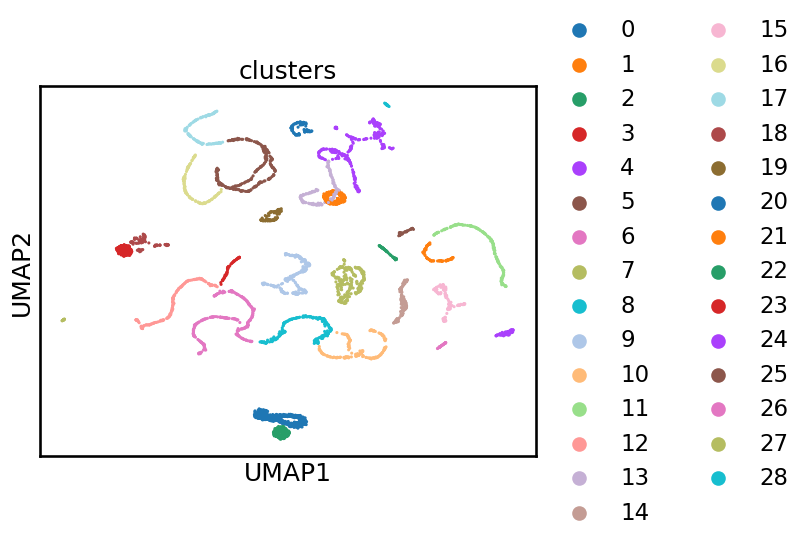

Integrating Datasets
[[0.         0.34595701 0.35823951 0.21187308 0.1       ]
 [0.         0.         0.37590999 0.3514229  0.35      ]
 [0.         0.         0.         0.28120224 0.45      ]
 [0.         0.         0.         0.         0.65      ]
 [0.         0.         0.         0.         0.        ]]
Processing datasets 34-year-old human stage <=> 35-year-old human stage
Processing datasets 33-year-old human stage <=> 35-year-old human stage
Processing datasets 31-year-old human stage <=> 33-year-old human stage
Processing datasets 30-year-old human stage <=> 33-year-old human stage
Processing datasets 31-year-old human stage <=> 34-year-old human stage
Processing datasets 31-year-old human stage <=> 35-year-old human stage
Processing datasets 30-year-old human stage <=> 31-year-old human stage
Processing datasets 33-year-old human stage <=> 34-year-old human stage
Processing datasets 30-year-old human stage <=> 34-year-old human stage


/home/user/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


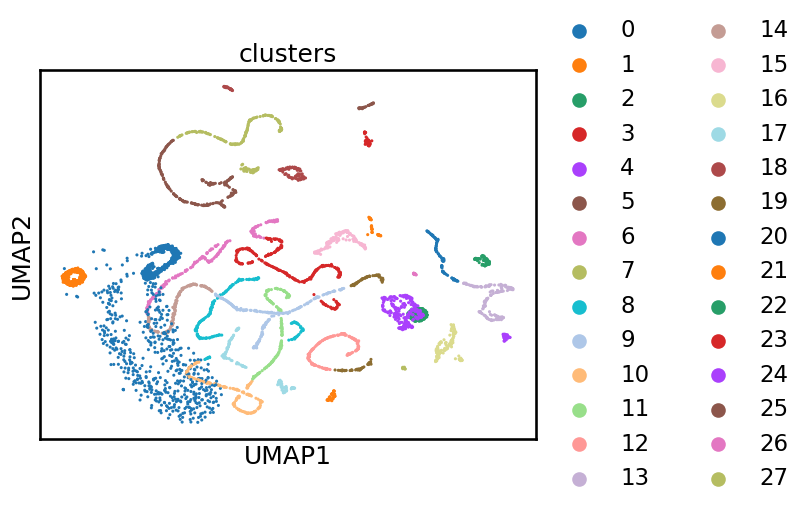

Integrating Datasets
[[0.         0.34800409 0.35823951 0.21187308 0.1       ]
 [0.         0.         0.36201191 0.3514229  0.35      ]
 [0.         0.         0.         0.28171167 0.45      ]
 [0.         0.         0.         0.         0.65      ]
 [0.         0.         0.         0.         0.        ]]
Processing datasets 34-year-old human stage <=> 35-year-old human stage
Processing datasets 33-year-old human stage <=> 35-year-old human stage
Processing datasets 31-year-old human stage <=> 33-year-old human stage
Processing datasets 30-year-old human stage <=> 33-year-old human stage
Processing datasets 31-year-old human stage <=> 34-year-old human stage
Processing datasets 31-year-old human stage <=> 35-year-old human stage
Processing datasets 30-year-old human stage <=> 31-year-old human stage
Processing datasets 33-year-old human stage <=> 34-year-old human stage
Processing datasets 30-year-old human stage <=> 34-year-old human stage


/home/user/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


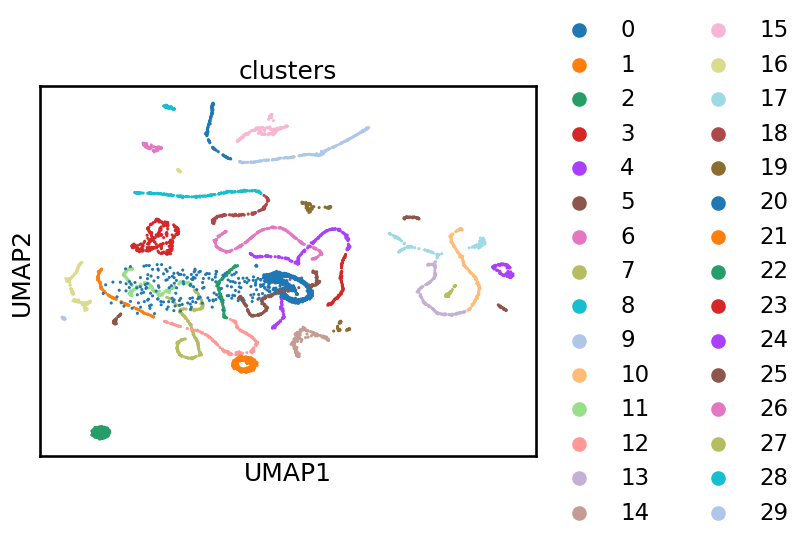

Integrating Datasets
[[0.         0.3654043  0.33776868 0.21187308 0.1       ]
 [0.         0.         0.36730642 0.3514229  0.35      ]
 [0.         0.         0.         0.28171167 0.45      ]
 [0.         0.         0.         0.         0.65      ]
 [0.         0.         0.         0.         0.        ]]
Processing datasets 34-year-old human stage <=> 35-year-old human stage
Processing datasets 33-year-old human stage <=> 35-year-old human stage
Processing datasets 31-year-old human stage <=> 33-year-old human stage
Processing datasets 30-year-old human stage <=> 31-year-old human stage
Processing datasets 31-year-old human stage <=> 34-year-old human stage
Processing datasets 31-year-old human stage <=> 35-year-old human stage
Processing datasets 30-year-old human stage <=> 33-year-old human stage
Processing datasets 33-year-old human stage <=> 34-year-old human stage
Processing datasets 30-year-old human stage <=> 34-year-old human stage


/home/user/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


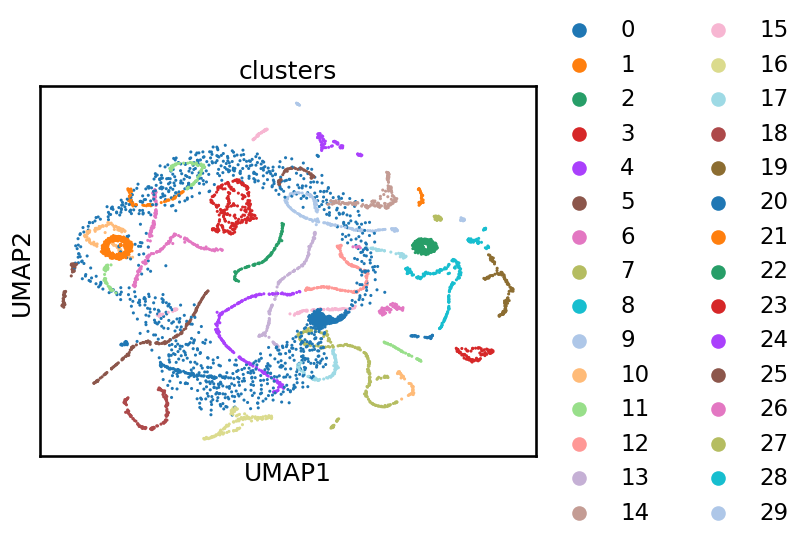

Integrating Datasets
[[0.         0.34493347 0.35823951 0.21187308 0.1       ]
 [0.         0.         0.36201191 0.3514229  0.35      ]
 [0.         0.         0.         0.28120224 0.45      ]
 [0.         0.         0.         0.         0.65      ]
 [0.         0.         0.         0.         0.        ]]
Processing datasets 34-year-old human stage <=> 35-year-old human stage
Processing datasets 33-year-old human stage <=> 35-year-old human stage
Processing datasets 31-year-old human stage <=> 33-year-old human stage
Processing datasets 30-year-old human stage <=> 33-year-old human stage
Processing datasets 31-year-old human stage <=> 34-year-old human stage
Processing datasets 31-year-old human stage <=> 35-year-old human stage
Processing datasets 30-year-old human stage <=> 31-year-old human stage
Processing datasets 33-year-old human stage <=> 34-year-old human stage
Processing datasets 30-year-old human stage <=> 34-year-old human stage


/home/user/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


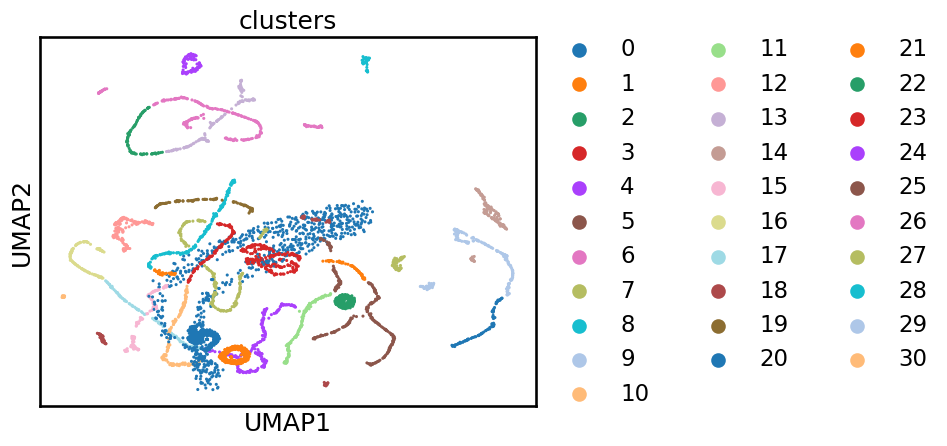

Normalizing Datasets


/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/scanpy/preprocessing/_deprecated/highly_variable_genes.py:195: RuntimeWarning: divide by zero encountered in divide
  np.abs(
/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/scanpy/preprocessing/_deprecated/highly_variable_genes.py:195: RuntimeWarning: invalid value encountered in divide
  np.abs(
2024-05-11 20:11:08,528 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...


Integrating Datasets


2024-05-11 20:11:09,731 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-05-11 20:11:09,781 - harmonypy - INFO - Iteration 1 of 10
2024-05-11 20:11:10,392 - harmonypy - INFO - Iteration 2 of 10
2024-05-11 20:11:11,004 - harmonypy - INFO - Iteration 3 of 10
2024-05-11 20:11:11,613 - harmonypy - INFO - Iteration 4 of 10
2024-05-11 20:11:12,211 - harmonypy - INFO - Iteration 5 of 10
2024-05-11 20:11:12,815 - harmonypy - INFO - Iteration 6 of 10
2024-05-11 20:11:13,124 - harmonypy - INFO - Converged after 6 iterations
/home/user/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


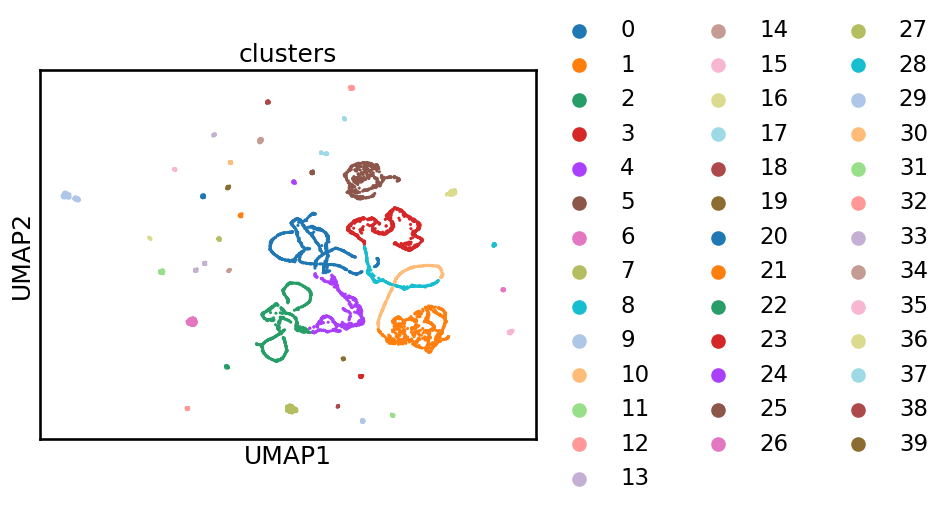

2024-05-11 20:11:25,456 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...


Integrating Datasets


2024-05-11 20:11:26,744 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-05-11 20:11:26,774 - harmonypy - INFO - Iteration 1 of 10
2024-05-11 20:11:27,404 - harmonypy - INFO - Iteration 2 of 10
2024-05-11 20:11:28,008 - harmonypy - INFO - Iteration 3 of 10
2024-05-11 20:11:28,614 - harmonypy - INFO - Iteration 4 of 10
2024-05-11 20:11:29,233 - harmonypy - INFO - Iteration 5 of 10
2024-05-11 20:11:29,848 - harmonypy - INFO - Iteration 6 of 10
2024-05-11 20:11:30,136 - harmonypy - INFO - Converged after 6 iterations
/home/user/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


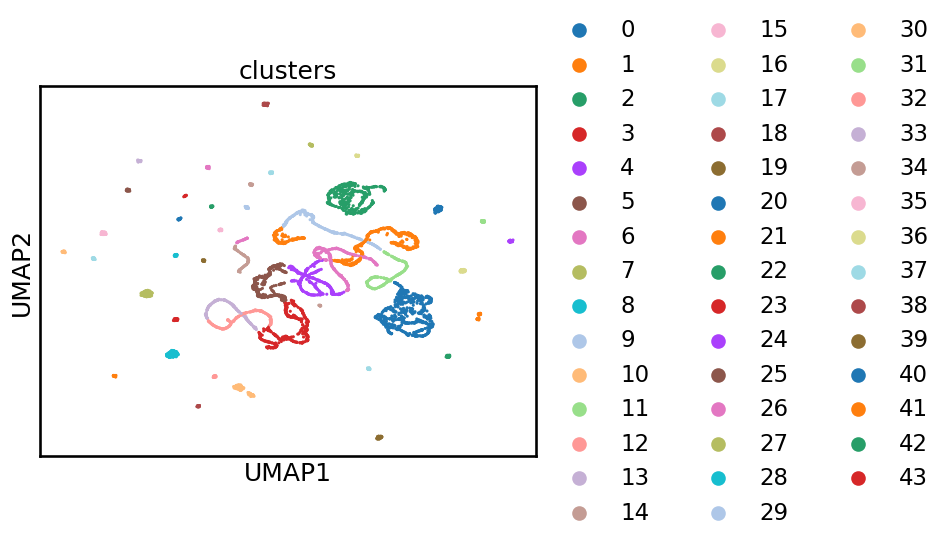

2024-05-11 20:11:42,880 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...


Integrating Datasets


2024-05-11 20:11:44,086 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-05-11 20:11:44,115 - harmonypy - INFO - Iteration 1 of 10
2024-05-11 20:11:44,729 - harmonypy - INFO - Iteration 2 of 10
2024-05-11 20:11:45,393 - harmonypy - INFO - Iteration 3 of 10
2024-05-11 20:11:46,186 - harmonypy - INFO - Iteration 4 of 10
2024-05-11 20:11:46,978 - harmonypy - INFO - Iteration 5 of 10
2024-05-11 20:11:47,741 - harmonypy - INFO - Iteration 6 of 10
2024-05-11 20:11:48,051 - harmonypy - INFO - Converged after 6 iterations
/home/user/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


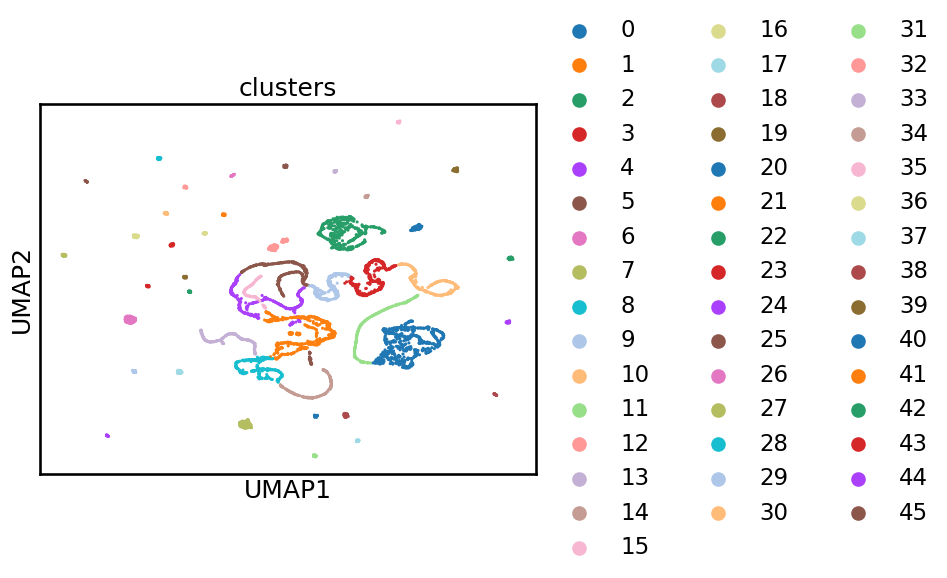

2024-05-11 20:12:00,674 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...


Integrating Datasets


2024-05-11 20:12:01,788 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-05-11 20:12:01,821 - harmonypy - INFO - Iteration 1 of 10
2024-05-11 20:12:02,543 - harmonypy - INFO - Iteration 2 of 10
2024-05-11 20:12:03,259 - harmonypy - INFO - Iteration 3 of 10
2024-05-11 20:12:03,980 - harmonypy - INFO - Iteration 4 of 10
2024-05-11 20:12:04,697 - harmonypy - INFO - Iteration 5 of 10
2024-05-11 20:12:05,423 - harmonypy - INFO - Iteration 6 of 10
2024-05-11 20:12:05,778 - harmonypy - INFO - Converged after 6 iterations
/home/user/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


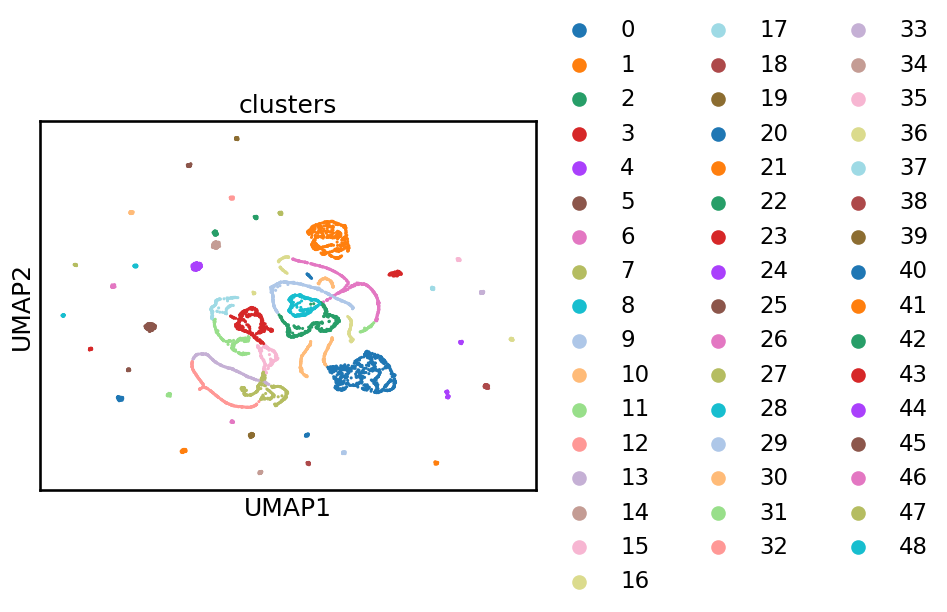

2024-05-11 20:12:18,921 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...


Integrating Datasets


2024-05-11 20:12:19,716 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-05-11 20:12:19,740 - harmonypy - INFO - Iteration 1 of 10
2024-05-11 20:12:20,409 - harmonypy - INFO - Iteration 2 of 10
2024-05-11 20:12:21,143 - harmonypy - INFO - Iteration 3 of 10
2024-05-11 20:12:21,871 - harmonypy - INFO - Iteration 4 of 10
2024-05-11 20:12:22,577 - harmonypy - INFO - Iteration 5 of 10
2024-05-11 20:12:23,369 - harmonypy - INFO - Iteration 6 of 10
2024-05-11 20:12:23,725 - harmonypy - INFO - Converged after 6 iterations
/home/user/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


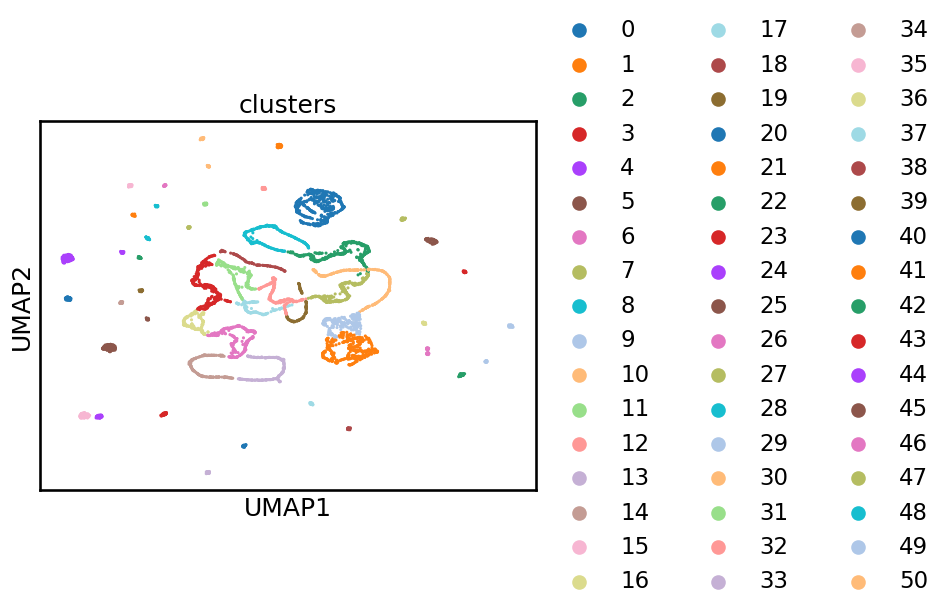

2024-05-11 20:12:37,009 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...


Integrating Datasets


2024-05-11 20:12:38,230 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-05-11 20:12:38,262 - harmonypy - INFO - Iteration 1 of 10
2024-05-11 20:12:38,882 - harmonypy - INFO - Iteration 2 of 10
2024-05-11 20:12:39,517 - harmonypy - INFO - Iteration 3 of 10
2024-05-11 20:12:40,124 - harmonypy - INFO - Iteration 4 of 10
2024-05-11 20:12:40,822 - harmonypy - INFO - Iteration 5 of 10
2024-05-11 20:12:41,574 - harmonypy - INFO - Iteration 6 of 10
2024-05-11 20:12:41,918 - harmonypy - INFO - Converged after 6 iterations
/home/user/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


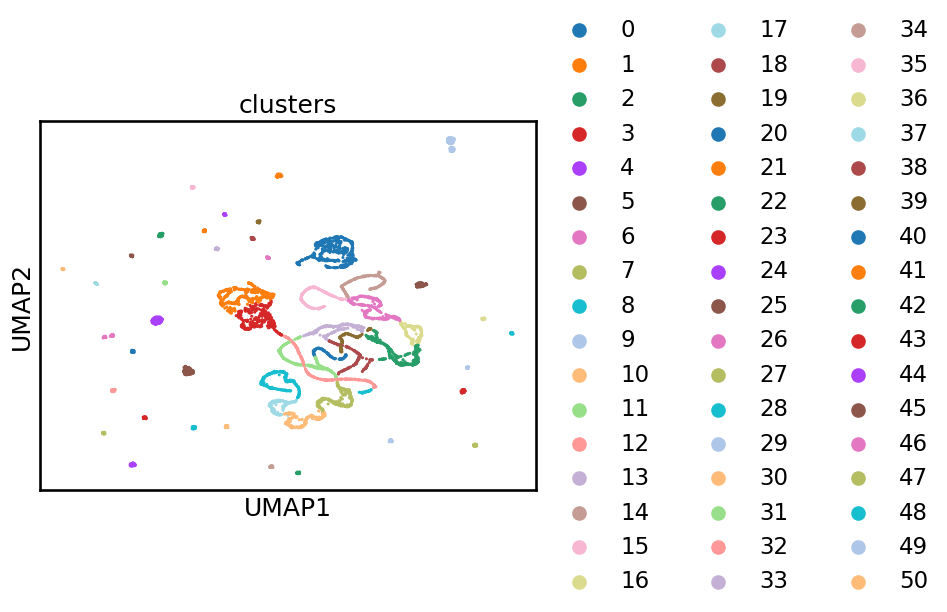

2024-05-11 20:12:55,221 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...


Integrating Datasets


2024-05-11 20:12:56,537 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-05-11 20:12:56,582 - harmonypy - INFO - Iteration 1 of 10
2024-05-11 20:12:57,213 - harmonypy - INFO - Iteration 2 of 10
2024-05-11 20:12:57,850 - harmonypy - INFO - Iteration 3 of 10
2024-05-11 20:12:58,489 - harmonypy - INFO - Iteration 4 of 10
2024-05-11 20:12:59,129 - harmonypy - INFO - Iteration 5 of 10
2024-05-11 20:12:59,761 - harmonypy - INFO - Iteration 6 of 10
2024-05-11 20:13:00,060 - harmonypy - INFO - Converged after 6 iterations
/home/user/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


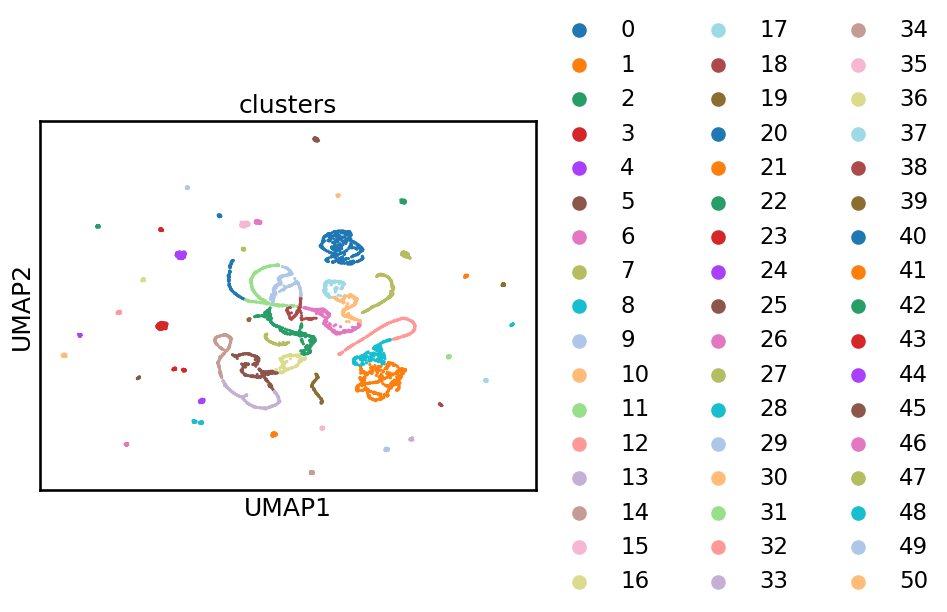

2024-05-11 20:13:13,194 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...


Integrating Datasets


2024-05-11 20:13:14,382 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-05-11 20:13:14,416 - harmonypy - INFO - Iteration 1 of 10
2024-05-11 20:13:15,039 - harmonypy - INFO - Iteration 2 of 10
2024-05-11 20:13:15,689 - harmonypy - INFO - Iteration 3 of 10
2024-05-11 20:13:16,340 - harmonypy - INFO - Iteration 4 of 10
2024-05-11 20:13:16,974 - harmonypy - INFO - Iteration 5 of 10
2024-05-11 20:13:17,606 - harmonypy - INFO - Iteration 6 of 10
2024-05-11 20:13:17,909 - harmonypy - INFO - Converged after 6 iterations
/home/user/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


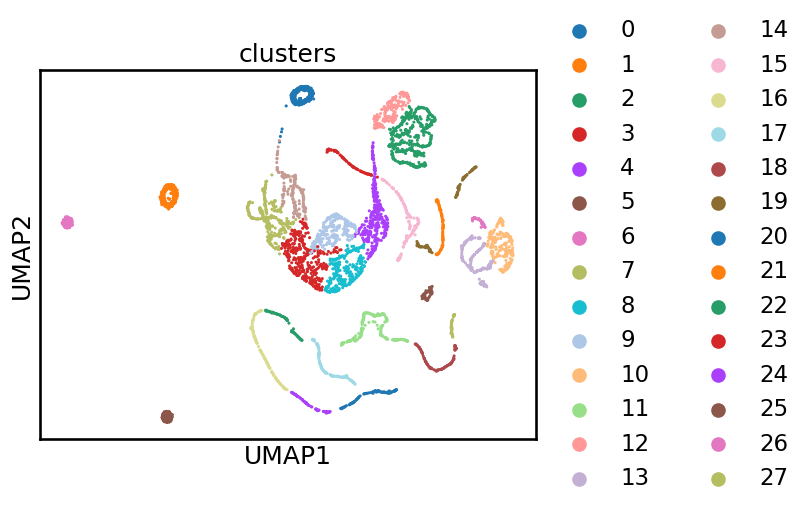

Integrating Datasets
[[0.         0.15148414 0.14534289 0.23586347 0.2       ]
 [0.         0.         0.55989411 0.35099338 0.1       ]
 [0.         0.         0.         0.53489557 0.25      ]
 [0.         0.         0.         0.         0.85      ]
 [0.         0.         0.         0.         0.        ]]
Processing datasets 34-year-old human stage <=> 35-year-old human stage
Processing datasets 31-year-old human stage <=> 33-year-old human stage
Processing datasets 33-year-old human stage <=> 34-year-old human stage
Processing datasets 31-year-old human stage <=> 34-year-old human stage
Processing datasets 33-year-old human stage <=> 35-year-old human stage
Processing datasets 30-year-old human stage <=> 34-year-old human stage
Processing datasets 30-year-old human stage <=> 35-year-old human stage
Processing datasets 30-year-old human stage <=> 31-year-old human stage
Processing datasets 30-year-old human stage <=> 33-year-old human stage


/home/user/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


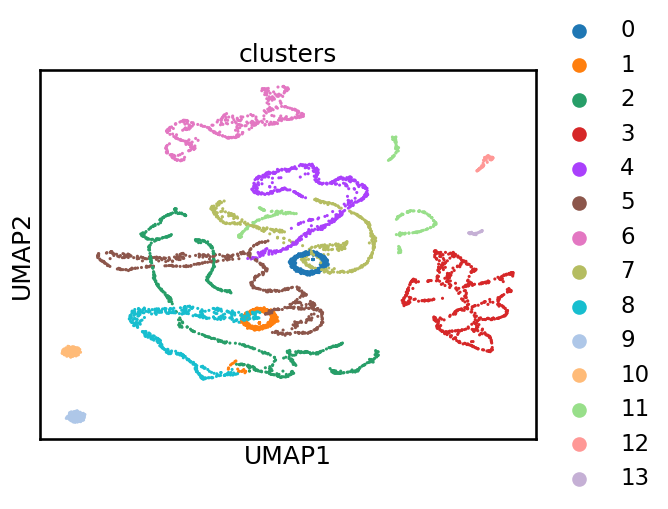

Integrating Datasets
[[0.         0.15046059 0.14534289 0.23586347 0.2       ]
 [0.         0.         0.56055592 0.35506877 0.15      ]
 [0.         0.         0.         0.53082017 0.25      ]
 [0.         0.         0.         0.         0.85      ]
 [0.         0.         0.         0.         0.        ]]
Processing datasets 34-year-old human stage <=> 35-year-old human stage
Processing datasets 31-year-old human stage <=> 33-year-old human stage
Processing datasets 33-year-old human stage <=> 34-year-old human stage
Processing datasets 31-year-old human stage <=> 34-year-old human stage
Processing datasets 33-year-old human stage <=> 35-year-old human stage
Processing datasets 30-year-old human stage <=> 34-year-old human stage
Processing datasets 30-year-old human stage <=> 35-year-old human stage
Processing datasets 30-year-old human stage <=> 31-year-old human stage
Processing datasets 31-year-old human stage <=> 35-year-old human stage
Processing datasets 30-year-old human st

/home/user/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


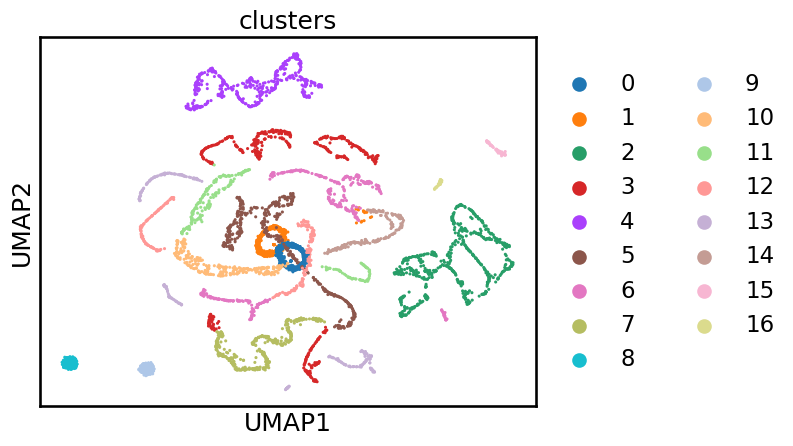

Integrating Datasets
[[0.         0.1555783  0.14534289 0.23586347 0.2       ]
 [0.         0.         0.56055592 0.35404992 0.1       ]
 [0.         0.         0.         0.53082017 0.25      ]
 [0.         0.         0.         0.         0.85      ]
 [0.         0.         0.         0.         0.        ]]
Processing datasets 34-year-old human stage <=> 35-year-old human stage
Processing datasets 31-year-old human stage <=> 33-year-old human stage
Processing datasets 33-year-old human stage <=> 34-year-old human stage
Processing datasets 31-year-old human stage <=> 34-year-old human stage
Processing datasets 33-year-old human stage <=> 35-year-old human stage
Processing datasets 30-year-old human stage <=> 34-year-old human stage
Processing datasets 30-year-old human stage <=> 35-year-old human stage
Processing datasets 30-year-old human stage <=> 31-year-old human stage
Processing datasets 30-year-old human stage <=> 33-year-old human stage


/home/user/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


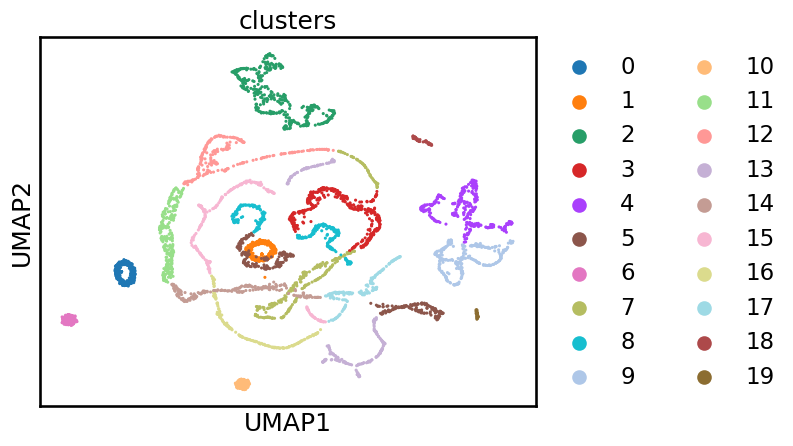

Integrating Datasets
[[0.         0.15148414 0.14534289 0.23586347 0.2       ]
 [0.         0.         0.56187955 0.3515028  0.15      ]
 [0.         0.         0.         0.53031075 0.25      ]
 [0.         0.         0.         0.         0.85      ]
 [0.         0.         0.         0.         0.        ]]
Processing datasets 34-year-old human stage <=> 35-year-old human stage
Processing datasets 31-year-old human stage <=> 33-year-old human stage
Processing datasets 33-year-old human stage <=> 34-year-old human stage
Processing datasets 31-year-old human stage <=> 34-year-old human stage
Processing datasets 33-year-old human stage <=> 35-year-old human stage
Processing datasets 30-year-old human stage <=> 34-year-old human stage
Processing datasets 30-year-old human stage <=> 35-year-old human stage
Processing datasets 30-year-old human stage <=> 31-year-old human stage
Processing datasets 31-year-old human stage <=> 35-year-old human stage
Processing datasets 30-year-old human st

/home/user/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


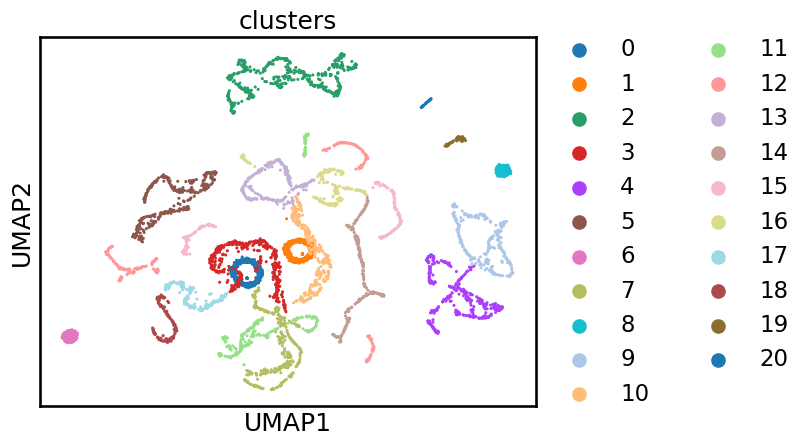

Integrating Datasets
[[0.         0.15148414 0.14534289 0.23586347 0.2       ]
 [0.         0.         0.56849768 0.35506877 0.1       ]
 [0.         0.         0.         0.53031075 0.55      ]
 [0.         0.         0.         0.         0.85      ]
 [0.         0.         0.         0.         0.        ]]
Processing datasets 34-year-old human stage <=> 35-year-old human stage
Processing datasets 31-year-old human stage <=> 33-year-old human stage
Processing datasets 33-year-old human stage <=> 35-year-old human stage
Processing datasets 33-year-old human stage <=> 34-year-old human stage
Processing datasets 31-year-old human stage <=> 34-year-old human stage
Processing datasets 30-year-old human stage <=> 34-year-old human stage
Processing datasets 30-year-old human stage <=> 35-year-old human stage
Processing datasets 30-year-old human stage <=> 31-year-old human stage
Processing datasets 30-year-old human stage <=> 33-year-old human stage


/home/user/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


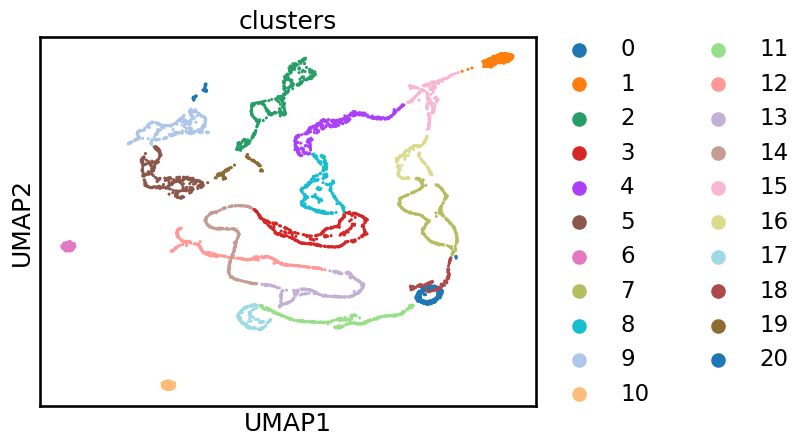

Integrating Datasets
[[0.         0.1555783  0.14534289 0.23586347 0.2       ]
 [0.         0.         0.56055592 0.35303107 0.1       ]
 [0.         0.         0.         0.53540499 0.25      ]
 [0.         0.         0.         0.         0.85      ]
 [0.         0.         0.         0.         0.        ]]
Processing datasets 34-year-old human stage <=> 35-year-old human stage
Processing datasets 31-year-old human stage <=> 33-year-old human stage
Processing datasets 33-year-old human stage <=> 34-year-old human stage
Processing datasets 31-year-old human stage <=> 34-year-old human stage
Processing datasets 33-year-old human stage <=> 35-year-old human stage
Processing datasets 30-year-old human stage <=> 34-year-old human stage
Processing datasets 30-year-old human stage <=> 35-year-old human stage
Processing datasets 30-year-old human stage <=> 31-year-old human stage
Processing datasets 30-year-old human stage <=> 33-year-old human stage


/home/user/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


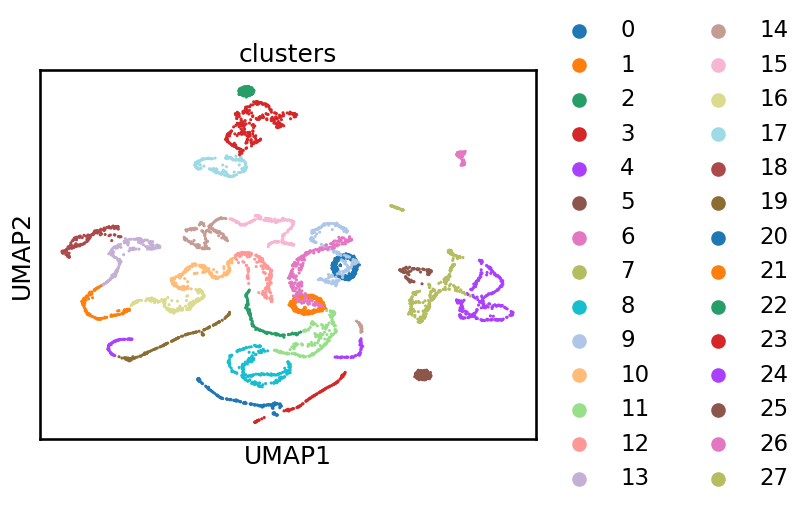

Integrating Datasets
[[0.         0.15250768 0.14534289 0.23586347 0.2       ]
 [0.         0.         0.57048312 0.3555782  0.15      ]
 [0.         0.         0.         0.53031075 0.25      ]
 [0.         0.         0.         0.         0.85      ]
 [0.         0.         0.         0.         0.        ]]
Processing datasets 34-year-old human stage <=> 35-year-old human stage
Processing datasets 31-year-old human stage <=> 33-year-old human stage
Processing datasets 33-year-old human stage <=> 34-year-old human stage
Processing datasets 31-year-old human stage <=> 34-year-old human stage
Processing datasets 33-year-old human stage <=> 35-year-old human stage
Processing datasets 30-year-old human stage <=> 34-year-old human stage
Processing datasets 30-year-old human stage <=> 35-year-old human stage
Processing datasets 30-year-old human stage <=> 31-year-old human stage
Processing datasets 31-year-old human stage <=> 35-year-old human stage
Processing datasets 30-year-old human st

/home/user/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


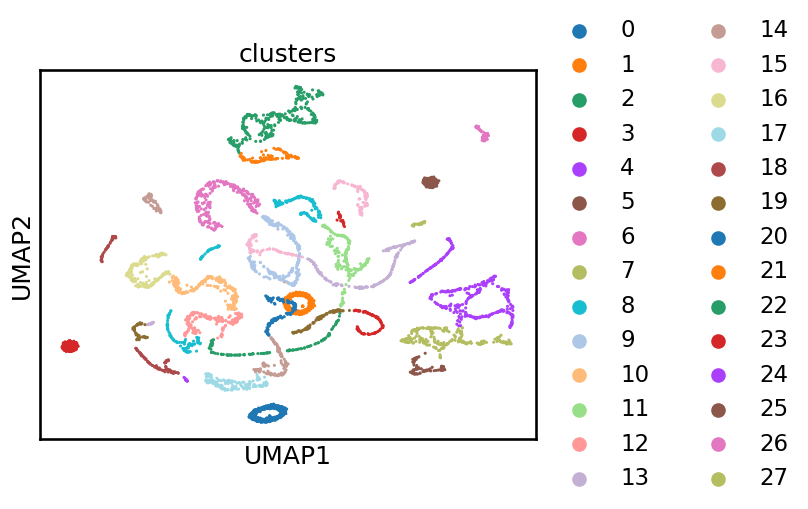

Integrating Datasets
[[0.         0.15353122 0.14534289 0.23586347 0.2       ]
 [0.         0.         0.56783587 0.35812532 0.1       ]
 [0.         0.         0.         0.53540499 0.55      ]
 [0.         0.         0.         0.         0.85      ]
 [0.         0.         0.         0.         0.        ]]
Processing datasets 34-year-old human stage <=> 35-year-old human stage
Processing datasets 31-year-old human stage <=> 33-year-old human stage
Processing datasets 33-year-old human stage <=> 35-year-old human stage
Processing datasets 33-year-old human stage <=> 34-year-old human stage
Processing datasets 31-year-old human stage <=> 34-year-old human stage
Processing datasets 30-year-old human stage <=> 34-year-old human stage
Processing datasets 30-year-old human stage <=> 35-year-old human stage
Processing datasets 30-year-old human stage <=> 31-year-old human stage
Processing datasets 30-year-old human stage <=> 33-year-old human stage


/home/user/.local/lib/python3.10/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


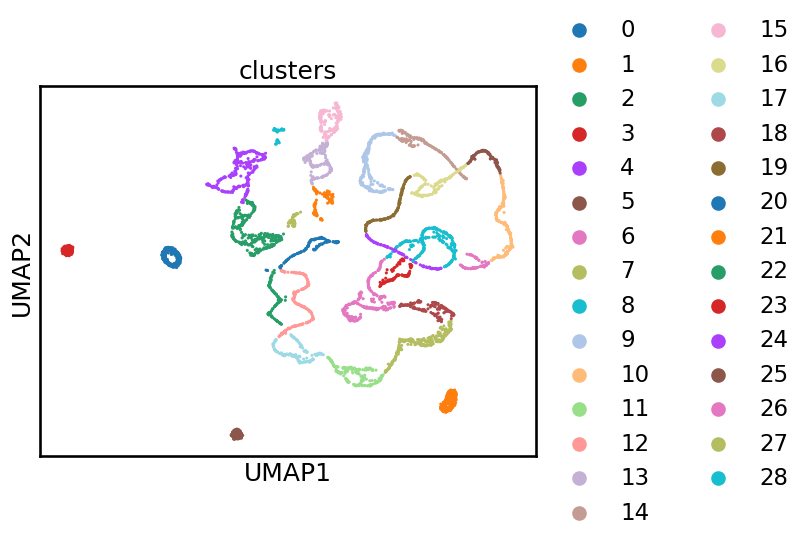

In [8]:
brca_res, report_brca, pipeline_brca = select_cell_type.search(datasets, key_metric="jaccard")

In [9]:
report_brca

jaccard       ari       nmi    Runtime  Number of Clusters
seurat  harmony    0.827068  0.108368  0.108368  19.062735                19.0
        merge      0.811905  0.113892  0.113892  15.712071                16.0
        scanorama  0.840602  0.108406  0.108406  18.283970                20.0
zheng17 harmony    0.678247  0.157958  0.157958  17.267038                56.0
        merge      0.730952  0.168576  0.168576  13.101649                15.0
        scanorama  0.761905  0.159397  0.159397  16.628547                21.0

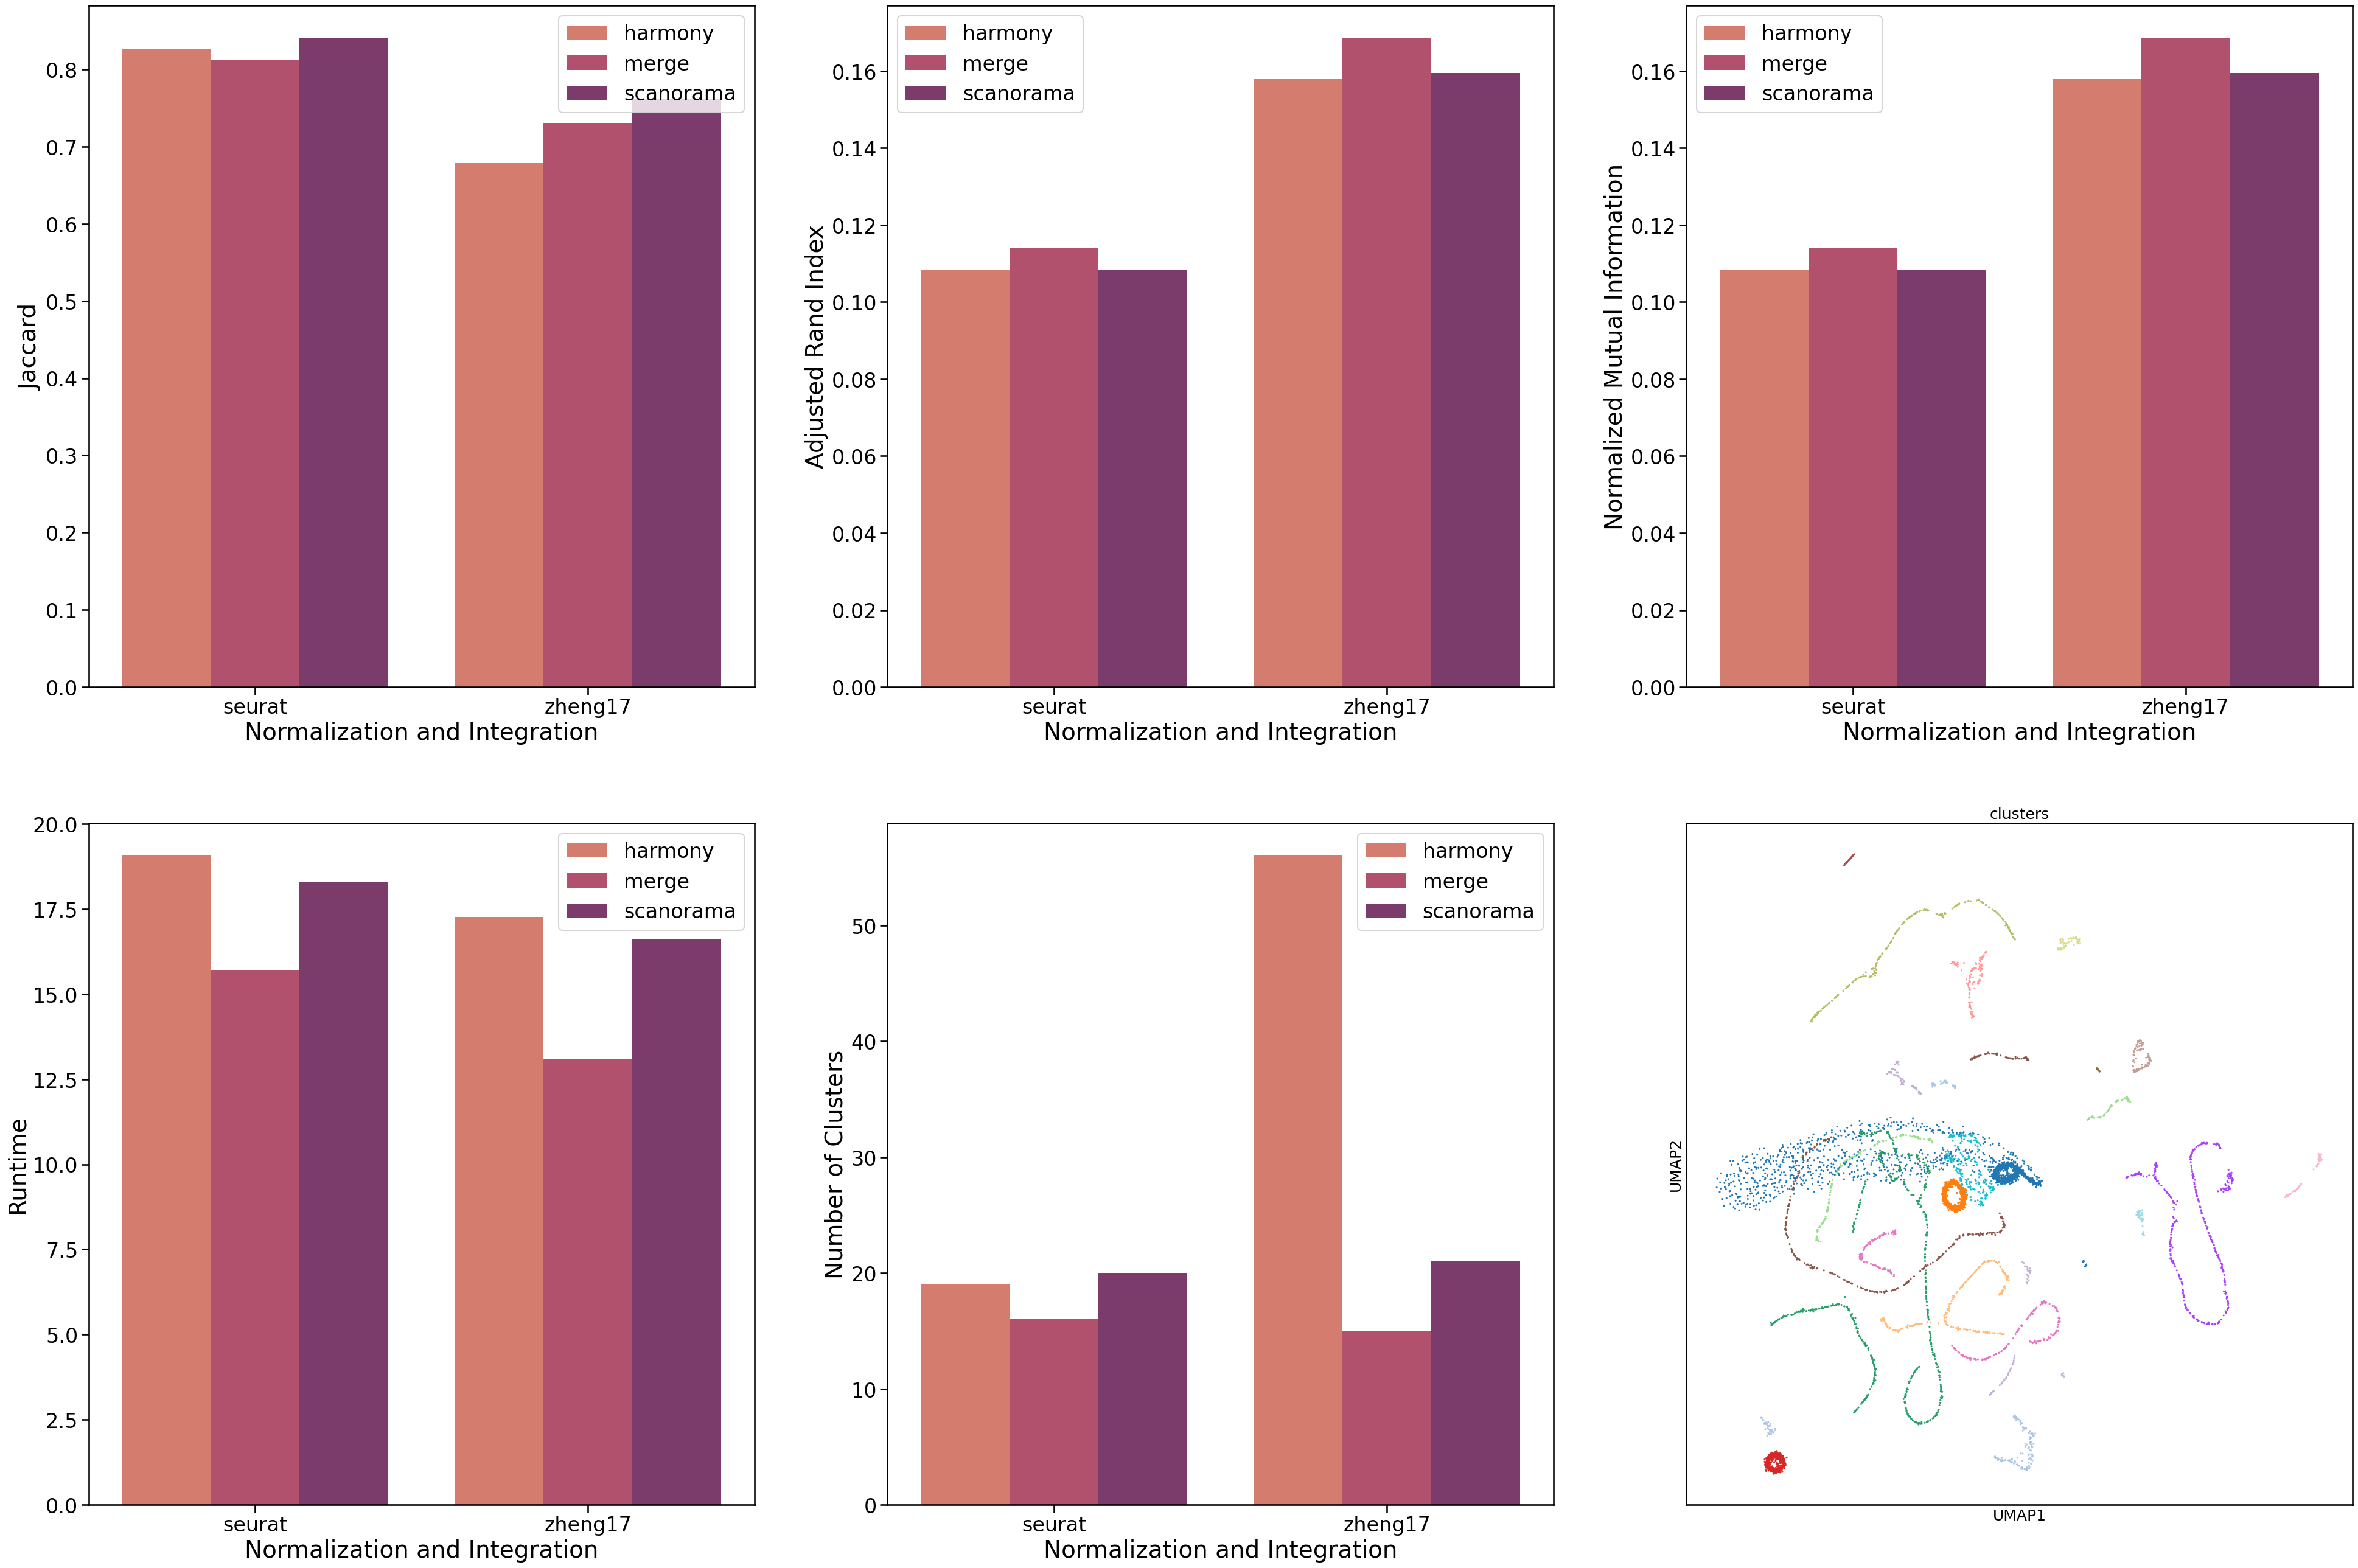

In [22]:
from scprocessing.visualization import visualize_report

visualize_report(report_brca, brca_res, "test.png")

In [255]:
select = SelectPipeline(normalization=["zheng17", "seurat"], integration=["merge", "harmony", "scanorama"])

Normalizing Datasets
Integrating Datasets


/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


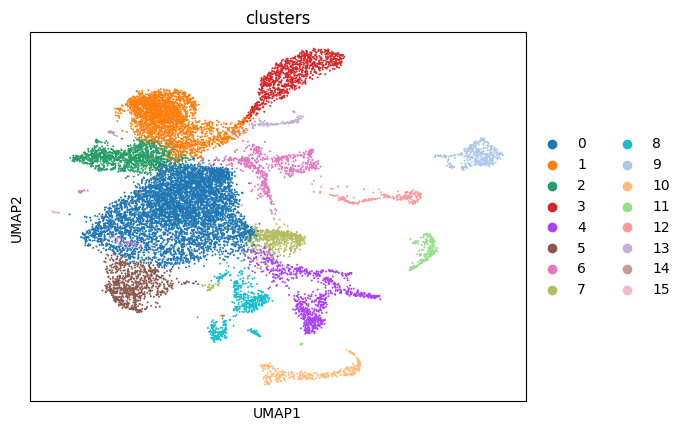

jaccard
silhouette
davies
calinski
Integrating Datasets


/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
2024-05-11 01:33:05,128 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-05-11 01:33:15,638 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-05-11 01:33:15,695 - harmonypy - INFO - Iteration 1 of 10
2024-05-11 01:33:18,053 - harmonypy - INFO - Iteration 2 of 10
2024-05-11 01:33:20,290 - harmonypy - INFO - Iteration 3 of 10
2024-05-11 01:33:22,593 - harmonypy - INFO - Iteration 4 of 10
2024-05-11 01:33:24,249 - harmonypy - INFO - Iteration 5 of 10
2024-05-11 01:33:26,077 - harmonypy - INFO - Iteration 6 of 10
2024-05-11 01:33:28,685 - harmonypy - INFO - Iteration 7 of 10
2024-05-11 01:33:29,830 - harmonypy - INFO - Iteration 8 of 10
2024-05-11 01:33:30,719 - harmonypy - INFO - Converged after 8 iterations


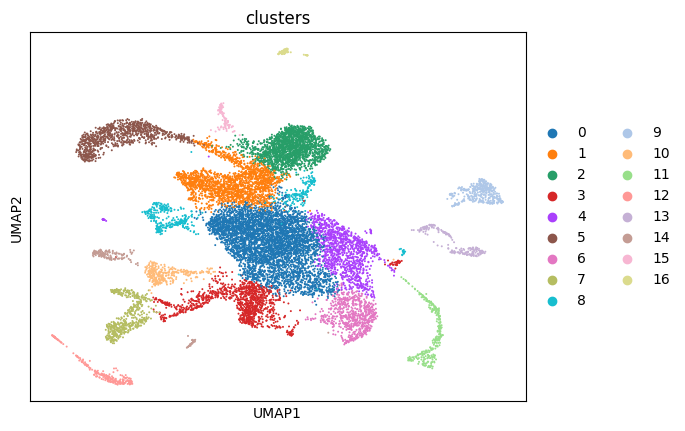

jaccard
silhouette
davies
calinski
Normalizing Datasets


/home/user/scRNAseq-benchmarking/scprocessing/SelectPipeline.py:68: UserWarning: Error occured while using zheng17 normalization and scanoram integration: Invalid Integration Method
  warnings.warn(
/home/user/scRNAseq-benchmarking/scprocessing/SelectPipeline.py:71: UserWarning: Skipping zheng17 normalization and scanoram integration
  warnings.warn(


Integrating Datasets


/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


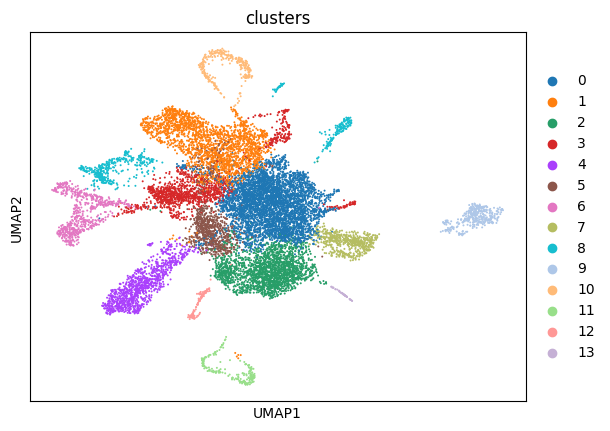

jaccard
silhouette
davies
calinski
Integrating Datasets


/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
2024-05-11 01:34:44,245 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-05-11 01:34:54,035 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-05-11 01:34:54,110 - harmonypy - INFO - Iteration 1 of 10
2024-05-11 01:34:56,248 - harmonypy - INFO - Iteration 2 of 10
2024-05-11 01:34:58,564 - harmonypy - INFO - Converged after 2 iterations


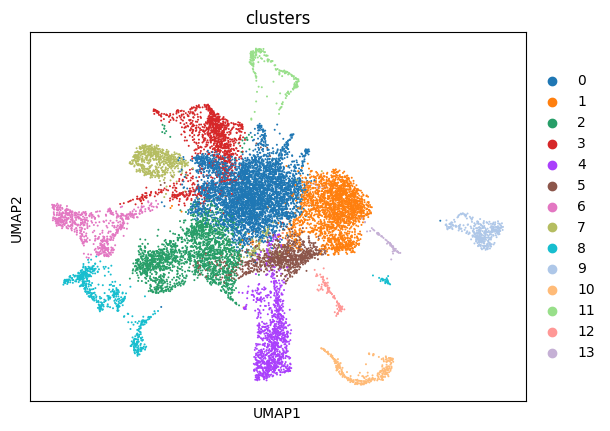

jaccard
silhouette
davies
calinski
      zheng17                  seurat            
        merge     harmony       merge     harmony
0    0.998283    0.998599    0.994969    0.995249
1    0.030454    0.029632   -0.010566   -0.011836
2    2.675973    2.871118    2.428602    2.460319
3  481.552202  480.681769  848.930445  838.767839
4   37.474411   62.723500   33.613431   44.173040


/home/user/scRNAseq-benchmarking/scprocessing/SelectPipeline.py:68: UserWarning: Error occured while using seurat normalization and scanoram integration: Invalid Integration Method
  warnings.warn(
/home/user/scRNAseq-benchmarking/scprocessing/SelectPipeline.py:71: UserWarning: Skipping seurat normalization and scanoram integration
  warnings.warn(


In [278]:
report_nsg_s_ctl, pipeline_nsg_s_ctl = select.search([nsg_ctl_1_data, nsg_ctl_2_data, nsg_ctl_3_data])

2024-05-10 22:10:20,981 - harmonypy - INFO - Iteration 2 of 10
2024-05-10 22:10:23,437 - harmonypy - INFO - Iteration 3 of 10
2024-05-10 22:10:26,064 - harmonypy - INFO - Iteration 4 of 10
2024-05-10 22:10:27,534 - harmonypy - INFO - Iteration 5 of 10
2024-05-10 22:10:29,059 - harmonypy - INFO - Iteration 6 of 10
2024-05-10 22:10:31,274 - harmonypy - INFO - Iteration 7 of 10
2024-05-10 22:10:32,517 - harmonypy - INFO - Iteration 8 of 10
2024-05-10 22:10:33,811 - harmonypy - INFO - Converged after 8 iterations


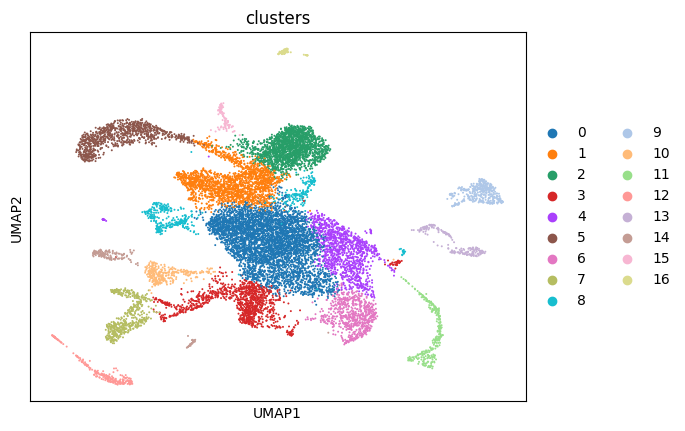

jaccard
silhouette
davies
calinski
Normalizing Datasets


/home/user/scRNAseq-benchmarking/scprocessing/SelectPipeline.py:68: UserWarning: Error occured while using zheng17 normalization and scanoram integration: Invalid Integration Method
  warnings.warn(
/home/user/scRNAseq-benchmarking/scprocessing/SelectPipeline.py:71: UserWarning: Skipping zheng17 normalization and scanoram integration
  warnings.warn(


Integrating Datasets


/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


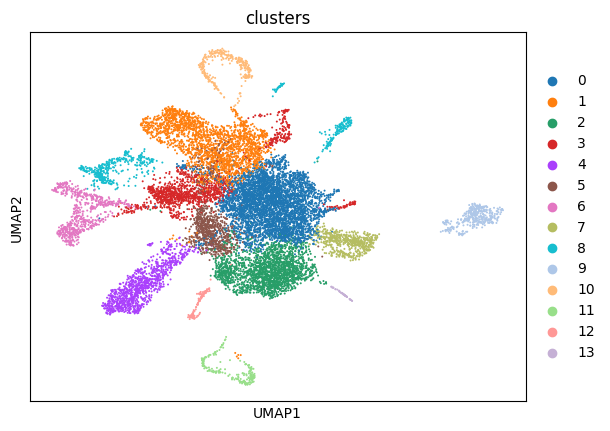

jaccard
silhouette
davies
calinski
Integrating Datasets


/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
2024-05-10 22:11:44,502 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-05-10 22:11:54,573 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-05-10 22:11:54,622 - harmonypy - INFO - Iteration 1 of 10
2024-05-10 22:11:57,257 - harmonypy - INFO - Iteration 2 of 10
2024-05-10 22:11:59,839 - harmonypy - INFO - Converged after 2 iterations


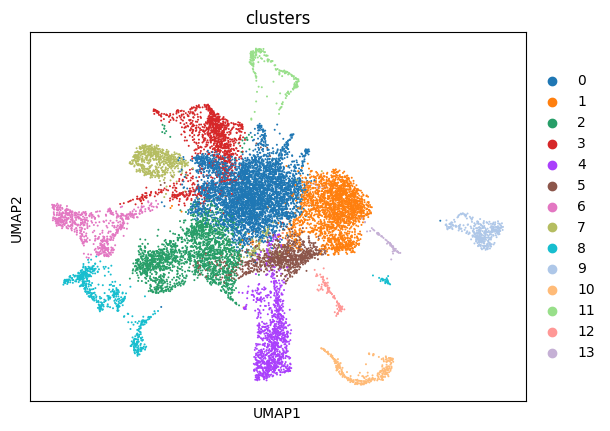

jaccard
silhouette
davies
calinski
      zheng17                  seurat            
        merge     harmony       merge     harmony
0    0.998283    0.998599    0.994969    0.995249
1    0.030454    0.029632   -0.010566   -0.011836
2    2.675973    2.871118    2.428602    2.460319
3  481.552202  480.681769  848.930445  838.767839
4   34.762731   62.514503   29.087291   47.479638


/home/user/scRNAseq-benchmarking/scprocessing/SelectPipeline.py:68: UserWarning: Error occured while using seurat normalization and scanoram integration: Invalid Integration Method
  warnings.warn(
/home/user/scRNAseq-benchmarking/scprocessing/SelectPipeline.py:71: UserWarning: Skipping seurat normalization and scanoram integration
  warnings.warn(


In [257]:
report_nsg_ctl, pipeline_nsg_ctl = select.search([nsg_ctl_1_data, nsg_ctl_2_data, nsg_ctl_3_data])

Normalizing Datasets
Integrating Datasets


/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


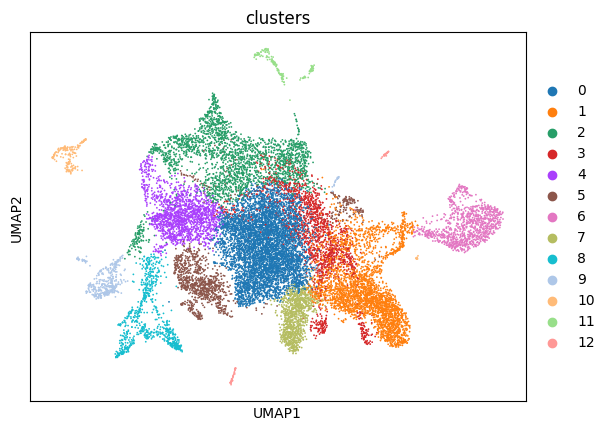

jaccard
silhouette
davies
calinski
Integrating Datasets


/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
2024-05-10 22:13:05,858 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-05-10 22:13:15,916 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-05-10 22:13:15,967 - harmonypy - INFO - Iteration 1 of 10
2024-05-10 22:13:20,249 - harmonypy - INFO - Iteration 2 of 10
2024-05-10 22:13:24,088 - harmonypy - INFO - Iteration 3 of 10
2024-05-10 22:13:27,613 - harmonypy - INFO - Iteration 4 of 10
2024-05-10 22:13:29,207 - harmonypy - INFO - Iteration 5 of 10
2024-05-10 22:13:30,311 - harmonypy - INFO - Iteration 6 of 10
2024-05-10 22:13:31,522 - harmonypy - INFO - Iteration 7 of 10
2024-05-10 22:13:32,735 - harmonypy - INFO - Converged after 7 iterations


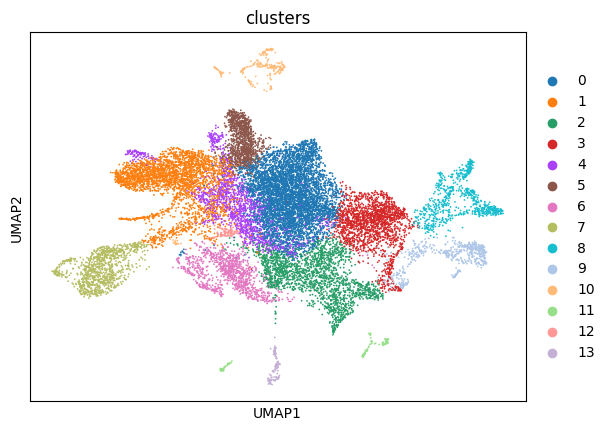

jaccard
silhouette
davies
calinski
Normalizing Datasets


/home/user/scRNAseq-benchmarking/scprocessing/SelectPipeline.py:68: UserWarning: Error occured while using zheng17 normalization and scanoram integration: Invalid Integration Method
  warnings.warn(
/home/user/scRNAseq-benchmarking/scprocessing/SelectPipeline.py:71: UserWarning: Skipping zheng17 normalization and scanoram integration
  warnings.warn(


Integrating Datasets


/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


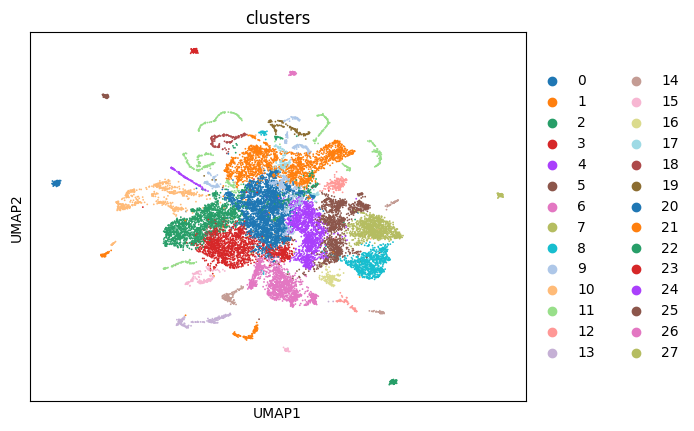

jaccard
silhouette
davies
calinski
Integrating Datasets


/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
2024-05-10 22:15:02,911 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-05-10 22:15:13,117 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-05-10 22:15:13,175 - harmonypy - INFO - Iteration 1 of 10
2024-05-10 22:15:16,601 - harmonypy - INFO - Iteration 2 of 10
2024-05-10 22:15:20,552 - harmonypy - INFO - Iteration 3 of 10
2024-05-10 22:15:23,903 - harmonypy - INFO - Iteration 4 of 10
2024-05-10 22:15:25,165 - harmonypy - INFO - Iteration 5 of 10
2024-05-10 22:15:27,307 - harmonypy - INFO - Iteration 6 of 10
2024-05-10 22:15:29,368 - harmonypy - INFO - Iteration 7 of 10
2024-05-10 22:15:31,551 - harmonypy - INFO - Iteration 8 of 10
2024-05-10 22:15:33,405 - harmonypy - INFO - Iteration 9 of 10
2024-05-10 22:15:34,709

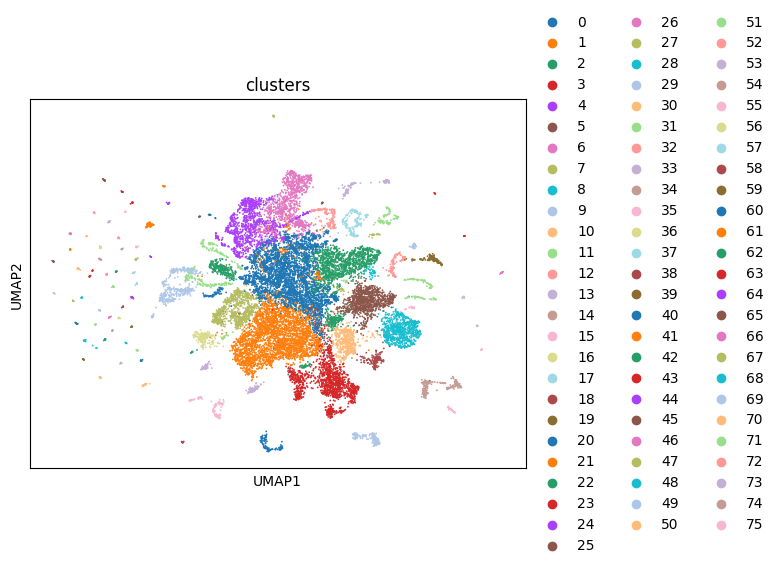

jaccard
silhouette
davies
calinski
      zheng17                  seurat            
        merge     harmony       merge     harmony
0    0.999234    0.998700    0.943625    0.767131
1   -0.019043   -0.018402   -0.168938   -0.162795
2    3.579296    3.593811    3.443571    5.469139
3  414.719495  377.471863  374.556166  152.422711
4   27.872916   61.476945   47.857618   74.090641


/home/user/scRNAseq-benchmarking/scprocessing/SelectPipeline.py:68: UserWarning: Error occured while using seurat normalization and scanoram integration: Invalid Integration Method
  warnings.warn(
/home/user/scRNAseq-benchmarking/scprocessing/SelectPipeline.py:71: UserWarning: Skipping seurat normalization and scanoram integration
  warnings.warn(


In [258]:
report_nsg_bus, pipeline_nsg_bus = select.search([nsg_bus_1_data, nsg_bus_2_data, nsg_bus_3_data])

Normalizing Datasets
Integrating Datasets


/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


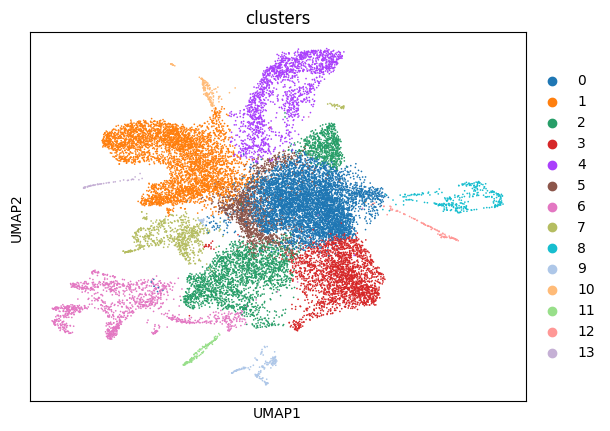

jaccard
silhouette
davies
calinski
Integrating Datasets


/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
2024-05-10 22:17:12,594 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-05-10 22:17:22,471 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-05-10 22:17:22,527 - harmonypy - INFO - Iteration 1 of 10
2024-05-10 22:17:25,458 - harmonypy - INFO - Iteration 2 of 10
2024-05-10 22:17:28,906 - harmonypy - INFO - Iteration 3 of 10
2024-05-10 22:17:34,089 - harmonypy - INFO - Iteration 4 of 10
2024-05-10 22:17:36,900 - harmonypy - INFO - Iteration 5 of 10
2024-05-10 22:17:40,254 - harmonypy - INFO - Iteration 6 of 10
2024-05-10 22:17:45,197 - harmonypy - INFO - Iteration 7 of 10
2024-05-10 22:17:46,968 - harmonypy - INFO - Iteration 8 of 10
2024-05-10 22:17:48,383 - harmonypy - INFO - Converged after 8 iterations


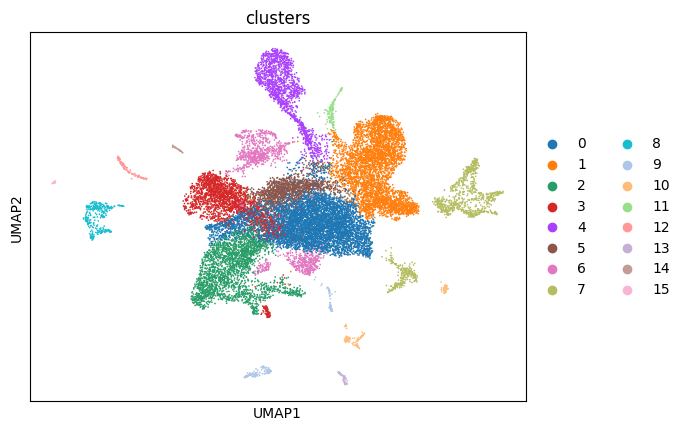

jaccard
silhouette
davies
calinski
Normalizing Datasets


/home/user/scRNAseq-benchmarking/scprocessing/SelectPipeline.py:68: UserWarning: Error occured while using zheng17 normalization and scanoram integration: Invalid Integration Method
  warnings.warn(
/home/user/scRNAseq-benchmarking/scprocessing/SelectPipeline.py:71: UserWarning: Skipping zheng17 normalization and scanoram integration
  warnings.warn(


Integrating Datasets


/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


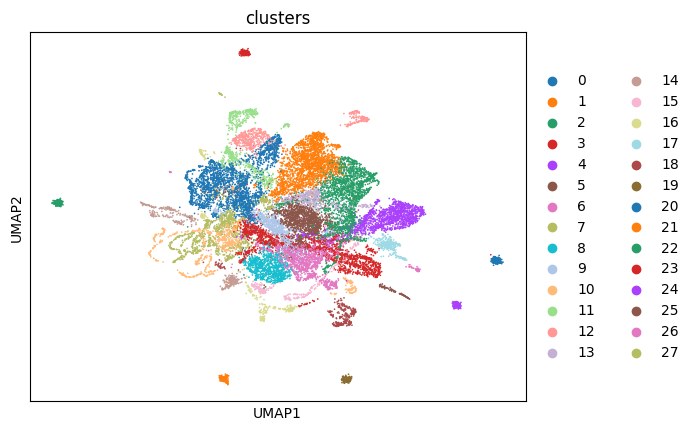

jaccard
silhouette
davies
calinski
Integrating Datasets


/home/user/.conda/envs/python3.8/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
2024-05-10 22:19:17,329 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-05-10 22:19:27,839 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-05-10 22:19:27,986 - harmonypy - INFO - Iteration 1 of 10
2024-05-10 22:19:31,944 - harmonypy - INFO - Iteration 2 of 10
2024-05-10 22:19:35,183 - harmonypy - INFO - Iteration 3 of 10
2024-05-10 22:19:38,956 - harmonypy - INFO - Iteration 4 of 10
2024-05-10 22:19:42,225 - harmonypy - INFO - Iteration 5 of 10
2024-05-10 22:19:48,434 - harmonypy - INFO - Iteration 6 of 10
2024-05-10 22:19:49,743 - harmonypy - INFO - Iteration 7 of 10
2024-05-10 22:19:51,167 - harmonypy - INFO - Iteration 8 of 10
2024-05-10 22:19:52,574 - harmonypy - INFO - Iteration 9 of 10
2024-05-10 22:19:53,971

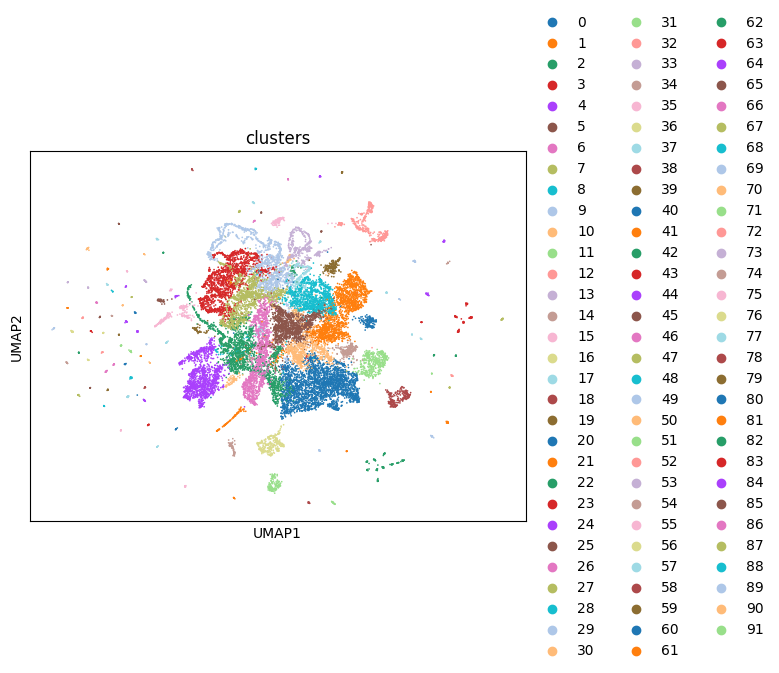

jaccard
silhouette
davies
calinski
      zheng17                  seurat            
        merge     harmony       merge     harmony
0    0.999271    0.998646    0.951221    0.747839
1   -0.033569   -0.032237   -0.181202   -0.193757
2    3.199734    3.150176    5.445296    4.521158
3  459.703181  404.575719  376.166145  116.151434
4   41.385427   74.762262   40.119924  106.539477


/home/user/scRNAseq-benchmarking/scprocessing/SelectPipeline.py:68: UserWarning: Error occured while using seurat normalization and scanoram integration: Invalid Integration Method
  warnings.warn(
/home/user/scRNAseq-benchmarking/scprocessing/SelectPipeline.py:71: UserWarning: Skipping seurat normalization and scanoram integration
  warnings.warn(


In [259]:
report_nsg_s_bus, pipeline_nsg_s_bus = select.search([nsg_s_bus_1_data, nsg_s_bus_2_data, nsg_s_bus_3_data])

In [260]:
# report_nsg_s_ctl, report_nsg_s_bus, report_nsg_bus, report_nsg_ctl
print(pipeline_nsg_s_ctl), print(pipeline_nsg_s_bus), print(pipeline_nsg_bus), print(pipeline_nsg_ctl)

SC Pipeline w/ ['zheng17', 'harmony']
SC Pipeline w/ ['zheng17', 'merge']
SC Pipeline w/ ['zheng17', 'merge']
SC Pipeline w/ ['zheng17', 'harmony']


(None, None, None, None)

In [261]:
report_nsg_s_ctl, report_nsg_s_bus, report_nsg_bus, report_nsg_ctl

(                  jaccard  silhouette    davies    calinski    Runtime
 zheng17 merge    0.998283    0.030454  2.675973  481.552202  36.373741
         harmony  0.998599    0.029632  2.871118  480.681769  57.969173
 seurat  merge    0.994969   -0.010566  2.428602  848.930445  30.385017
         harmony  0.995249   -0.011836  2.460319  838.767839  44.079557,
                   jaccard  silhouette    davies    calinski     Runtime
 zheng17 merge    0.999271   -0.033569  3.199734  459.703181   41.385427
         harmony  0.998646   -0.032237  3.150176  404.575719   74.762262
 seurat  merge    0.951221   -0.181202  5.445296  376.166145   40.119924
         harmony  0.747839   -0.193757  4.521158  116.151434  106.539477,
                   jaccard  silhouette    davies    calinski    Runtime
 zheng17 merge    0.999234   -0.019043  3.579296  414.719495  27.872916
         harmony  0.998700   -0.018402  3.593811  377.471863  61.476945
 seurat  merge    0.943625   -0.168938  3.443571  374.556